<a href="https://colab.research.google.com/github/moiyajosephs/Thesis/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
import statsmodels.formula.api as smf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from statsmodels.stats.anova import anova_lm

# Descriptive statistics

## ELA

### Number of Tested Student

In [ ]:
ela_df=pd.read_excel("ela.xlsx",sheet_name="All")
years_of_interest = [2018,2019,2022,2023]
pre_pandemic = [year for year in years_of_interest if year <= 2020]
df_filtered = ela_df[ela_df['Year'].isin(pre_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade     
2018  3              67226
      4              67552
      5              68395
      6              65067
      7              65175
      8              63087
      All Grades    396502
2019  3              64710
      4              66772
      5              66207
      6              66150
      7              64952
      8              63669
      All Grades    392460
Name: Number Tested, dtype: int64

#### Average Proficiency Rate Pre Pandemic

In [ ]:
df_filtered[df_filtered["Year"] < 2020]["% Level 3+4"].mean()


np.float64(44.89269177825893)

In [ ]:
post_pandemic = [year for year in years_of_interest if year >= 2020]
df_filtered = ela_df[ela_df['Year'].isin(post_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade     
2022  3              50967
      4              53196
      5              54122
      6              53390
      7              55650
      8              55395
      All Grades    322720
2023  3              49453
      4              51008
      5              53235
      6              51996
      7              53472
      8              53919
      All Grades    313083
Name: Number Tested, dtype: int64

#### Average Proficiency Rate Post Pandemic

In [ ]:
df_filtered[df_filtered["Year"] >= 2020]["% Level 3+4"].mean()

np.float64(48.00011165225447)

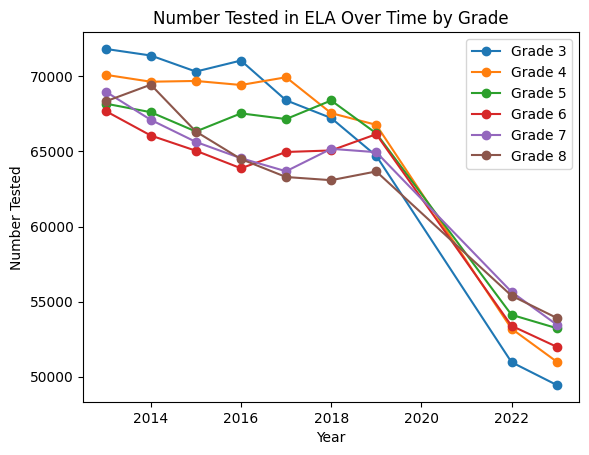

In [ ]:
#Filter out All Grades to get a more granular analysis
ela_df = ela_df[ela_df["Grade"]!="All Grades"]
year_comparison = ela_df.groupby(["Year","Grade"])["Number Tested"].sum().reset_index()


for grade in year_comparison["Grade"].unique():
  subset = year_comparison[year_comparison["Grade"] == grade]
  plt.plot(subset["Year"], subset["Number Tested"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Number Tested")
plt.title("Number Tested in ELA Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
df_filtered = ela_df[ela_df['Year'].isin(years_of_interest)]
df_filtered.head()

District Grade  Year      Category  Number Tested  Mean Scale Score  \
0         1     3  2023  All Students            520        451.532684   
1         1     4  2023  All Students            497        457.867218   
2         1     5  2023  All Students            523        455.086029   
3         1     6  2023  All Students            518        455.171814   
4         1     7  2023  All Students            568        456.084503   

   # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
0        121  23.269230        114  21.923077        146  28.076923   
1         72  14.486921        130  26.156942        118  23.742455   
2        108  20.650095        104  19.885277        155  29.636711   
3         74  14.285714        127  24.517374        131  25.289576   
4        102  17.957747        132  23.239437        154  27.112677   

   # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0        139  26.730770          285    54.807693  
1        177  35.613682          295    59.356136  
2        156  29.827915          311    59.464626  
3        186  35.907337          317    61.196911  
4        180  31.690142          334    58.802818

In [ ]:
tested_by_district = df_filtered.groupby(["District", "Year"])["Number Tested"].sum().reset_index()

tested_by_district["Period"] = tested_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

district_summary = tested_by_district.groupby(["District", "Period"])["Number Tested"].sum().reset_index()

district_comparison = district_summary.pivot(index="District", columns="Period", values="Number Tested").fillna(0).reset_index()

In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["% Level 3+4"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["% Level 3+4"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="% Level 3+4").fillna(0).reset_index()

In [ ]:
performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors.head(3)

Period  District  2020 and After  Before 2020    Change
22            23       33.670369    26.540403  7.129966
15            16       39.903902    32.941812  6.962089
12            13       53.052439    46.473817  6.578623

In [ ]:
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["% Level 3+4"].mean().reset_index()
grade_year_performance

Grade  Year  % Level 3+4
0       3  2018    49.161366
1       3  2019    51.649105
2       3  2022    46.903968
3       3  2023    46.524749
4       4  2018    47.720745
5       4  2019    48.083361
6       4  2022    40.974439
7       4  2023    50.735666
8       5  2018    36.405582
9       5  2019    37.928834
10      5  2022    36.619257
11      5  2023    47.550499
12      6  2018    45.745224
13      6  2019    45.430157
14      6  2022    53.468599
15      6  2023    45.461652
16      7  2018    40.012089
17      7  2019    40.222634
18      7  2022    49.670764
19      7  2023    49.558144
20      8  2018    47.927959
21      8  2019    48.259948
22      8  2022    50.255426
23      8  2023    57.973958

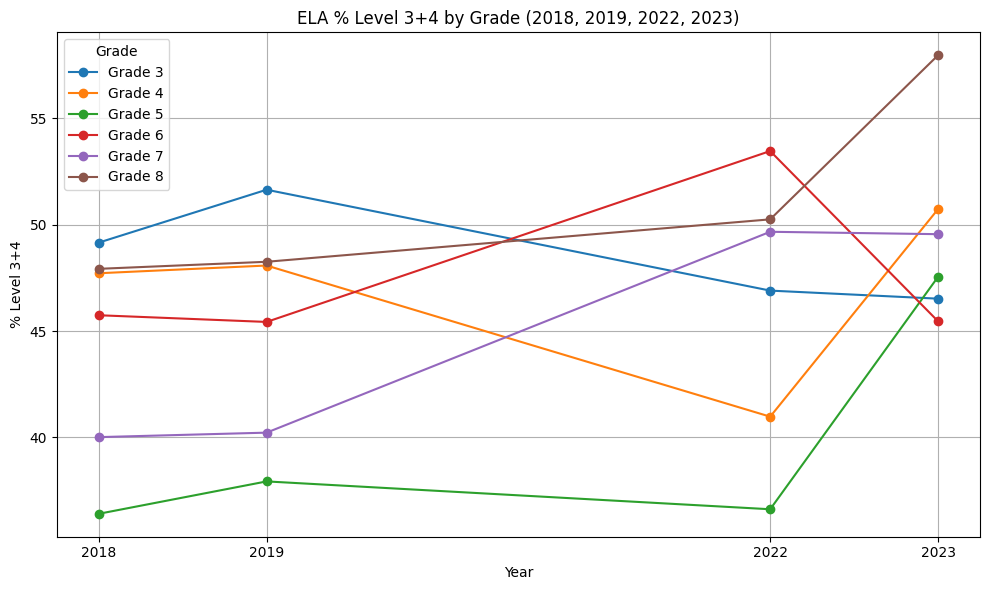

In [ ]:
pivot_df = grade_year_performance.pivot(index="Year", columns="Grade", values="% Level 3+4")

# Plot
plt.figure(figsize=(10, 6))
for grade in sorted(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[grade], marker='o', label=f'Grade {grade}')

plt.title("ELA % Level 3+4 by Grade (2018, 2019, 2022, 2023)")
plt.xlabel("Year")
plt.ylabel("% Level 3+4")
plt.xticks([2018, 2019, 2022, 2023])
plt.legend(title="Grade")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmax()
]

best_group_by_year

District Grade  Year      Category  Number Tested  Mean Scale Score  \
1596        26     3  2018  All Students           1760        614.233521   
1589        26     3  2019  All Students           1741        612.600220   
70           2     3  2022  All Students           2151        612.400269   
63           2     3  2023  All Students           2025        462.150604   
85           2     4  2018  All Students           2649        616.499084   
78           2     4  2019  All Students           2591        614.258179   
71           2     4  2022  All Students           2209        612.721619   
64           2     4  2023  All Students           2057        467.658722   
86           2     5  2018  All Students           2757        615.547363   
79           2     5  2019  All Students           2561        614.903137   
72           2     5  2022  All Students           2141        613.866882   
65           2     5  2023  All Students           2122        465.297821   
1599        26     6  2018  All Students           1899        612.467590   
1592        26     6  2019  All Students           2094        613.117004   
73           2     6  2022  All Students           2088        615.192993   
66           2     6  2023  All Students           1992        461.206818   
1600        26     7  2018  All Students           1877        614.247742   
81           2     7  2019  All Students           2531        615.018982   
1586        26     7  2022  All Students           1696        619.186890   
67           2     7  2023  All Students           2007        465.154449   
1601        26     8  2018  All Students           1961        613.354431   
1594        26     8  2019  All Students           1847        612.258789   
1587        26     8  2022  All Students           1755        614.480347   
1580        26     8  2023  All Students           1570        469.135681   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
1596         76   4.318182        304  17.272728        975  55.397728   
1589         71   4.078116        311  17.863297        957  54.968410   
70          119   5.532310        388  18.038122       1206  56.066944   
63          211  10.419753        295  14.567902        679  33.530865   
85          143   5.398263        415  15.666289        742  28.010571   
78          161   6.213817        394  15.206484        844  32.574295   
71          176   7.967406        390  17.655048        548  24.807606   
64          133   6.465727        268  13.028683        579  28.147787   
86          271   9.829525        561  20.348204        783  28.400434   
79          325  12.690355        442  17.258883        753  29.402576   
72          220  10.275572        502  23.446987        529  24.708080   
65          170   8.011310        295  13.901979        760  35.815269   
1599        179   9.426014        315  16.587677        421  22.169563   
1592        228  10.888252        273  13.037250        380  18.147087   
73          207   9.913794        207   9.913794        404  19.348660   
66          175   8.785141        311  15.612450        638  32.028114   
1600        174   9.270112        366  19.499201        691  36.814064   
81          251   9.917028        442  17.463453        836  33.030422   
1586         84   4.952830        260  15.330189        492  29.009434   
67          178   8.868958        280  13.951171        627  31.240658   
1601        129   6.578276        346  17.644058        559  28.505865   
1594        112   6.063888        373  20.194910        538  29.128317   
1587        104   5.925926        270  15.384615        511  29.116810   
1580         56   3.566879        215  13.694267        463  29.490446   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
1596        405  23.011364         1380    78.409088  
1589        402  23.090178         1359    78.058586  
70          438  20.362621         1644    76.429565  
63       

In [ ]:
best_group_by_year["District"].unique()

array([26,  2])

## Math

In [ ]:
math_df=pd.read_excel("math.xlsx",sheet_name="All")
years_of_interest = [2018,2019,2022,2023]
pre_pandemic = [year for year in years_of_interest if year <= 2020]
df_filtered = math_df[math_df['Year'].isin(pre_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade     
2018  3              68675
      4              68843
      5              69372
      6              65979
      7              65713
      8              49725
      All Grades    388307
2019  3              66091
      4              68046
      5              67387
      6              66908
      7              65437
      8              49366
      All Grades    383235
Name: Number Tested, dtype: int64

In [ ]:
before_2020 = df_filtered[df_filtered["Year"] < 2020]["% Level 3+4"].mean()

In [ ]:
post_pandemic = [year for year in years_of_interest if year >= 2020]
df_filtered = ela_df[ela_df['Year'].isin(post_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade
2022  3        50967
      4        53196
      5        54122
      6        53390
      7        55650
      8        55395
2023  3        49453
      4        51008
      5        53235
      6        51996
      7        53472
      8        53919
Name: Number Tested, dtype: int64

In [ ]:
after_2020 = df_filtered[df_filtered["Year"] >= 2020]["% Level 3+4"].mean()

### Number of Tested Students

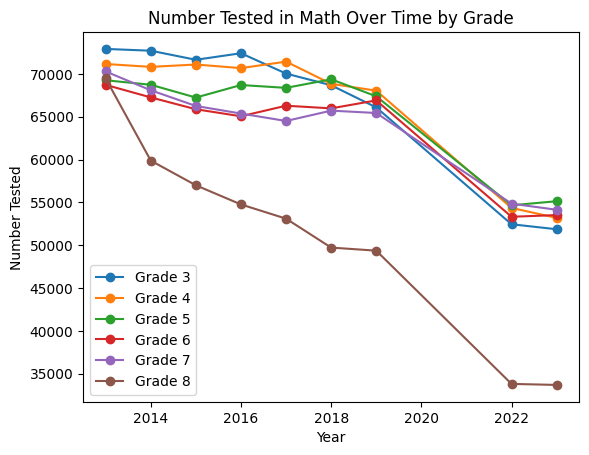

In [ ]:
#Filter out All Grades to get a more granular analysis
math_df = math_df[math_df["Grade"]!="All Grades"]
year_comparison = math_df.groupby(["Year","Grade"])["Number Tested"].sum().reset_index()


for grade in year_comparison["Grade"].unique():
  subset = year_comparison[year_comparison["Grade"] == grade]
  plt.plot(subset["Year"], subset["Number Tested"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Number Tested")
plt.title("Number Tested in Math Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
df_filtered = math_df[math_df['Year'].isin(years_of_interest)]
df_filtered.head()

District Grade  Year      Category  Number Tested  Mean Scale Score  \
0         1     3  2023  All Students            575        454.118256   
1         1     4  2023  All Students            537        454.886414   
2         1     5  2023  All Students            559        456.059021   
3         1     6  2023  All Students            558        460.560944   
4         1     7  2023  All Students            586        459.976105   

   # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
0        113  19.652174        160  27.826086        146  25.391304   
1        145  27.001862         94  17.504656        160  29.795158   
2        180  32.200359         89  15.921288        110  19.677996   
3        127  22.759857        108  19.354839        153  27.419355   
4        107  18.259386        127  21.672356        156  26.621161   

   # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0        156  27.130434          302    52.521740  
1        138  25.698324          298    55.493481  
2        180  32.200359          290    51.878353  
3        170  30.465950          323    57.885303  
4        196  33.447098          352    60.068260

In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["% Level 3+4"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["% Level 3+4"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="% Level 3+4").fillna(0).reset_index()

performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors.head(3)

Period  District  2020 and After  Before 2020    Change
17            18       37.510754    32.089619  5.421135
22            23       25.597204    21.900248  3.696956
15            16       31.708737    28.311794  3.396944

In [ ]:
# Group by Grade and Year to calculate average % Level 3+4 across all districts
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["% Level 3+4"].mean().reset_index()
grade_year_performance

Grade  Year  % Level 3+4
0       3  2018    50.523025
1       3  2019    51.500024
2       3  2022    46.010542
3       3  2023    52.724284
4       4  2018    43.859224
5       4  2019    46.918843
6       4  2022    38.572158
7       4  2023    49.677272
8       5  2018    39.355048
9       5  2019    43.393494
10      5  2022    34.812175
11      5  2023    47.162441
12      6  2018    36.313313
13      6  2019    40.613857
14      6  2022    30.886832
15      6  2023    42.366390
16      7  2018    36.206762
17      7  2019    38.860648
18      7  2022    32.161496
19      7  2023    48.125436
20      8  2018    29.178701
21      8  2019    32.082447
22      8  2022    22.300899
23      8  2023    38.635246

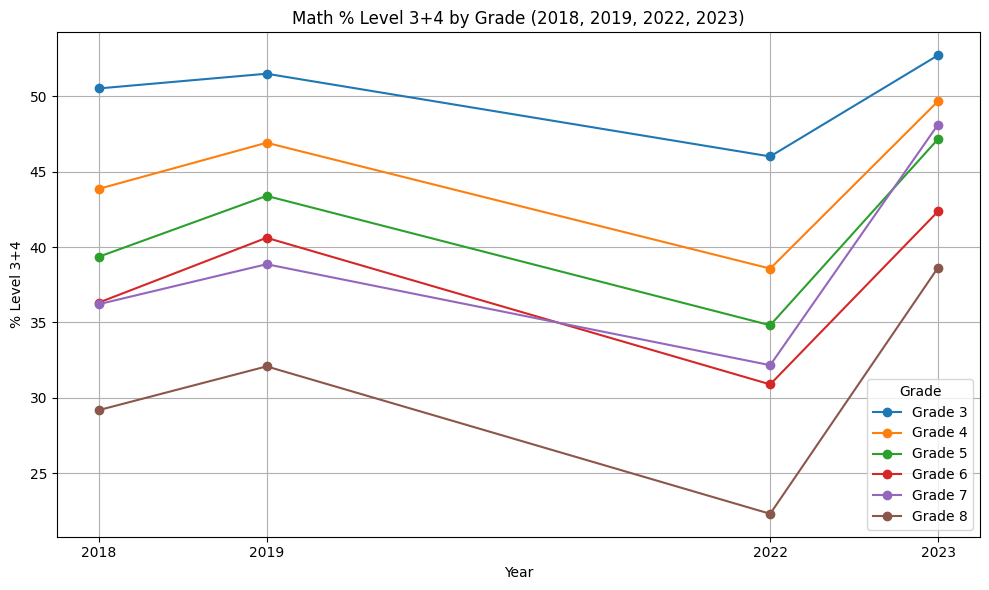

In [ ]:
# Pivot for plotting
pivot_df = grade_year_performance.pivot(index="Year", columns="Grade", values="% Level 3+4")

# Plot
plt.figure(figsize=(10, 6))
for grade in sorted(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[grade], marker='o', label=f'Grade {grade}')

plt.title("Math % Level 3+4 by Grade (2018, 2019, 2022, 2023)")
plt.xlabel("Year")
plt.ylabel("% Level 3+4")
plt.xticks([2018, 2019, 2022, 2023])
plt.legend(title="Grade")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmax()
]

best_group_by_year

District Grade  Year      Category  Number Tested  Mean Scale Score  \
1596        26     3  2018  All Students           1776        613.503357   
77           2     3  2019  All Students           2655        613.477966   
1582        26     3  2022  All Students           1550        611.116760   
1575        26     3  2023  All Students           1493        471.189545   
1597        26     4  2018  All Students           1793        614.767456   
1590        26     4  2019  All Students           1796        615.661499   
71           2     4  2022  All Students           2234        611.542541   
64           2     4  2023  All Students           2131        472.404968   
86           2     5  2018  All Students           2783        615.058228   
1591        26     5  2019  All Students           1851        614.911377   
1584        26     5  2022  All Students           1529        612.279297   
1577        26     5  2023  All Students           1673        472.455475   
1599        26     6  2018  All Students           1897        614.620483   
1592        26     6  2019  All Students           2094        615.351013   
1585        26     6  2022  All Students           1662        611.116699   
1578        26     6  2023  All Students           1655        473.427795   
1600        26     7  2018  All Students           1827        615.328979   
81           2     7  2019  All Students           2552        616.019592   
1586        26     7  2022  All Students           1592        614.232422   
1579        26     7  2023  All Students           1604        475.170196   
1601        26     8  2018  All Students           1098        614.012756   
1279        21     8  2019  All Students           2797        613.759766   
1209        20     8  2022  All Students           2512        607.876221   
1202        20     8  2023  All Students           2858        465.228821   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
1596         93   5.236486        228  12.837838        589  33.164413   
77          202   7.608286        293  11.035782        745  28.060265   
1582        132   8.516129        203  13.096774        539  34.774193   
1575         68   4.554588        216  14.467515        599  40.120564   
1597        109   6.079197        286  15.950920        429  23.926380   
1590         92   5.122494        279  15.534521        411  22.884188   
71          252  11.280215        321  14.368845        536  23.992838   
64          207   9.713750        218  10.229939        796  37.353355   
86          314  11.282788        362  13.007545        682  24.505928   
1591        195  10.534846        248  13.398163        426  23.014587   
1584        205  13.407455        273  17.854807        314  20.536299   
1577        123   7.352062        220  13.150030        606  36.222355   
1599        210  11.070110        309  16.288877        423  22.298367   
1592        198   9.455587        314  14.995224        461  22.015282   
1585        266  16.004814        301  18.110710        332  19.975933   
1578        158   9.546828        217  13.111782        561  33.897282   
1600        161   8.812261        291  15.927751        504  27.586206   
81          274  10.736677        380  14.890282        584  22.884012   
1586        160  10.050251        310  19.472363        394  24.748743   
1579        100   6.234414        221  13.778055        410  25.561098   
1601        166  15.118397        272  24.772314        274  24.954462   
1279        542  19.377905        560  20.021452        600  21.451555   
1209        721  28.702229        556  22.133759        460  18.312101   
1202        613  21.448565        336  11.756473        861  30.125961   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
1596        866  48.761261         1455    81.925674  
77         1415  53.295670         2160    81.355934  
1582        676  43.612904         1215    78.387100  
1575     

In [ ]:
best_group_by_year["District"].unique()

array([26,  2, 21, 20])

In [ ]:
# find the best district by grade and year

worst_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmax()
]

worst_group_by_year

District Grade  Year      Category  Number Tested  Mean Scale Score  \
1596        26     3  2018  All Students           1776        613.503357   
77           2     3  2019  All Students           2655        613.477966   
1582        26     3  2022  All Students           1550        611.116760   
1575        26     3  2023  All Students           1493        471.189545   
1597        26     4  2018  All Students           1793        614.767456   
1590        26     4  2019  All Students           1796        615.661499   
71           2     4  2022  All Students           2234        611.542541   
64           2     4  2023  All Students           2131        472.404968   
86           2     5  2018  All Students           2783        615.058228   
1591        26     5  2019  All Students           1851        614.911377   
1584        26     5  2022  All Students           1529        612.279297   
1577        26     5  2023  All Students           1673        472.455475   
1599        26     6  2018  All Students           1897        614.620483   
1592        26     6  2019  All Students           2094        615.351013   
1585        26     6  2022  All Students           1662        611.116699   
1578        26     6  2023  All Students           1655        473.427795   
1600        26     7  2018  All Students           1827        615.328979   
81           2     7  2019  All Students           2552        616.019592   
1586        26     7  2022  All Students           1592        614.232422   
1579        26     7  2023  All Students           1604        475.170196   
1601        26     8  2018  All Students           1098        614.012756   
1279        21     8  2019  All Students           2797        613.759766   
1209        20     8  2022  All Students           2512        607.876221   
1202        20     8  2023  All Students           2858        465.228821   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
1596         93   5.236486        228  12.837838        589  33.164413   
77          202   7.608286        293  11.035782        745  28.060265   
1582        132   8.516129        203  13.096774        539  34.774193   
1575         68   4.554588        216  14.467515        599  40.120564   
1597        109   6.079197        286  15.950920        429  23.926380   
1590         92   5.122494        279  15.534521        411  22.884188   
71          252  11.280215        321  14.368845        536  23.992838   
64          207   9.713750        218  10.229939        796  37.353355   
86          314  11.282788        362  13.007545        682  24.505928   
1591        195  10.534846        248  13.398163        426  23.014587   
1584        205  13.407455        273  17.854807        314  20.536299   
1577        123   7.352062        220  13.150030        606  36.222355   
1599        210  11.070110        309  16.288877        423  22.298367   
1592        198   9.455587        314  14.995224        461  22.015282   
1585        266  16.004814        301  18.110710        332  19.975933   
1578        158   9.546828        217  13.111782        561  33.897282   
1600        161   8.812261        291  15.927751        504  27.586206   
81          274  10.736677        380  14.890282        584  22.884012   
1586        160  10.050251        310  19.472363        394  24.748743   
1579        100   6.234414        221  13.778055        410  25.561098   
1601        166  15.118397        272  24.772314        274  24.954462   
1279        542  19.377905        560  20.021452        600  21.451555   
1209        721  28.702229        556  22.133759        460  18.312101   
1202        613  21.448565        336  11.756473        861  30.125961   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
1596        866  48.761261         1455    81.925674  
77         1415  53.295670         2160    81.355934  
1582        676  43.612904         1215    78.387100  
1575     

In [ ]:
worst_group_by_year["District"].unique()

array([26,  2, 21, 20])

# Inferential Statistics

In [ ]:
def year_group(year):
    if year in [2018, 2019, 2020]:
        return "Pre-Pandemic"
    elif year in [2021, 2022, 2023]:
        return "Post-Pandemic"
    else:
        return None

# SWD



In [ ]:
ela_swd_df=pd.read_excel("ela.xlsx",sheet_name="SWD")
ela_swd_df

District       Grade  Year Category  Number Tested  Mean Scale Score  \
0            1           3  2023  Not SWD            408        457.181366   
1            1           3  2023      SWD            112        430.955353   
2            1           4  2023  Not SWD            415        463.016876   
3            1           4  2023      SWD             82        431.804871   
4            1           5  2023  Not SWD            413        461.508484   
...        ...         ...   ...      ...            ...               ...   
4027        32           7  2013      SWD            214        257.172882   
4028        32           8  2013  Not SWD           1066        288.746704   
4029        32           8  2013      SWD            221        257.113129   
4030        32  All Grades  2013  Not SWD           6123        292.273224   
4031        32  All Grades  2013      SWD           1384        260.203766   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
0            56  13.725491         94  23.039215        124  30.392157   
1            65  58.035713         20  17.857143         22  19.642857   
2            36   8.674699        100  24.096386        105  25.301205   
3            36  43.902439         30  36.585365         13  15.853659   
4            48  11.622276         73  17.675545        139  33.656174   
...         ...        ...        ...        ...        ...        ...   
4027        171  79.906540         38  17.757010          5   2.336449   
4028        441  41.369606        413  38.742966        161  15.103189   
4029        181  81.900452         33  14.932127          7   3.167421   
4030       2460  40.176384       2508  40.960312        914  14.927323   
4031       1079  77.962425        265  19.147398         38   2.745665   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0           134  32.843136          258    63.235294  
1             5   4.464286           27    24.107143  
2           174  41.927711          279    67.228912  
3             3   3.658537           16    19.512196  
4           153  37.046005          292    70.702179  
...         ...        ...          ...          ...  
4027          0   0.000000            5     2.336449  
4028         51   4.784240          212    19.887430  
4029          0   0.000000            7     3.167421  
4030        241   3.935979         1155    18.863302  
4031          2   0.144509           40     2.890173  

[4032 rows x 16 columns]

In [ ]:
# Filter for "All Grades"
ela_swd_df = ela_swd_df[ela_swd_df["Grade"] == "All Grades"].copy()
ela_swd_df.head()

District       Grade  Year Category  Number Tested  Mean Scale Score  \
12         1  All Grades  2023  Not SWD           2468        461.342773   
13         1  All Grades  2023      SWD            700        434.598572   
26         1  All Grades  2022  Not SWD           2588        610.251160   
27         1  All Grades  2022      SWD            695        585.863281   
40         1  All Grades  2019  Not SWD           3176        611.118408   

    # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
12        227   9.197731        510  20.664505        764  30.956240   
13        307  43.857143        236  33.714287        118  16.857143   
26        308  11.901082        632  24.420403        713  27.550232   
27        342  49.208633        239  34.388489         80  11.510792   
40        335  10.547859        737  23.205290        956  30.100756   

    # Level 4  % Level 4  # Level 3+4  % Level 3+4  
12        967  39.181522         1731    70.137764  
13         39   5.571429          157    22.428572  
26        935  36.128284         1648    63.678516  
27         34   4.892087          114    16.402878  
40       1148  36.146095         2104    66.246849

## ELA

In [ ]:
ela_swd_df_filtered = ela_swd_df[ela_swd_df["Year"].between(2018, 2023)].copy()

### Best Performing SWD District

In [ ]:
ela_swd_df_only = ela_swd_df[ela_swd_df["Category"] == "SWD"].copy()
avg_scores_by_district = ela_swd_df_only.groupby("District")["Mean Scale Score"].mean().reset_index()
best_district = avg_scores_by_district.sort_values("Mean Scale Score", ascending=False).head(1)
best_district

District  Mean Scale Score
1         2        411.029185

### Worst Performing SWD District

In [ ]:
worst_district = avg_scores_by_district.sort_values("Mean Scale Score", ascending=True).head(1)
worst_district

District  Mean Scale Score
11        12        384.556575

### ANOVA

In [ ]:
ela_swd_df_filtered["Year Group"] = ela_swd_df_filtered["Year"].apply(year_group)

ela_swd_df_filtered = ela_swd_df_filtered.dropna(subset=["Year Group"])

model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=ela_swd_df_filtered).fit()
swd_anova_results = anova_lm(model)
swd_anova_results

df         sum_sq        mean_sq  \
C(Category)                       1.0   23960.226039   23960.226039   
C(Q('Year Group'))                1.0  361330.102773  361330.102773   
C(Category):C(Q('Year Group'))    1.0       0.089058       0.089058   
Residual                        252.0  748937.963244    2971.976045   

                                         F        PR(>F)  
C(Category)                       8.062052  4.888889e-03  
C(Q('Year Group'))              121.579076  2.496683e-23  
C(Category):C(Q('Year Group'))    0.000030  9.956366e-01  
Residual                               NaN           NaN

### By District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=ela_swd_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df         sum_sq        mean_sq  \
C(District)                      31.0    6584.382435     212.399433   
C(Q('Year Group'))                1.0  361330.102773  361330.102773   
C(District):C(Q('Year Group'))   31.0      52.272702       1.686216   
Residual                        192.0  766261.623204    3990.945954   

                                        F        PR(>F)  
C(District)                      0.053220  1.000000e+00  
C(Q('Year Group'))              90.537458  7.867577e-18  
C(District):C(Q('Year Group'))   0.000423  1.000000e+00  
Residual                              NaN           NaN

### Regression

#### Linear Regression

In [ ]:
ela_swd_df["Year"] = pd.to_numeric(ela_swd_df["Year"])

ela_swd_df = ela_swd_df[ela_swd_df['Mean Scale Score'] != 's']
ela_swd_df['Mean Scale Score'] = pd.to_numeric(ela_swd_df['Mean Scale Score'])

district_yearly_avg = ela_swd_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]


In [ ]:
district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)


In [ ]:
district_regression_df

District  R-squared  Coef (Year)   P-value
0          1   0.493930   -22.195741  0.297198
1          2   0.489612   -22.055633  0.300277
2          3   0.487401   -22.094639  0.301859
3          4   0.478523   -21.884912  0.308247
4          5   0.487465   -22.256687  0.301813
5          6   0.484725   -22.242149  0.303778
6          7   0.487666   -22.408798  0.301669
7          8   0.495918   -22.642798  0.295785
8          9   0.485923   -22.352030  0.302918
9         10   0.487977   -22.362289  0.301447
10        11   0.491535   -22.326977  0.298905
11        12   0.483616   -22.131232  0.304575
12        13   0.485025   -21.919667  0.303563
13        14   0.482969   -21.845443  0.305040
14        15   0.484809   -21.990020  0.303718
15        16   0.486160   -22.146271  0.302748
16        17   0.480495   -22.118404  0.306822
17        18   0.473263   -21.888995  0.312059
18        19   0.481945   -21.994667  0.305777
19        20   0.472702   -21.751963  0.312467
20        21   0.484892   -22.448134  0.303658
21        22   0.488475   -22.355958  0.301090
22        23   0.479041   -21.811026  0.307872
23        24   0.489409   -22.649070  0.300422
24        25   0.486065   -22.290311  0.302816
25        26   0.486594   -22.174698  0.302437
26        27   0.489733   -22.457371  0.300191
27        28   0.480798   -21.994292  0.306604
28        29   0.483964   -22.163229  0.304325
29        30   0.481745   -22.107676  0.305921
30        31   0.488681   -22.263555  0.300943
31        32   0.490691   -22.547309  0.299506

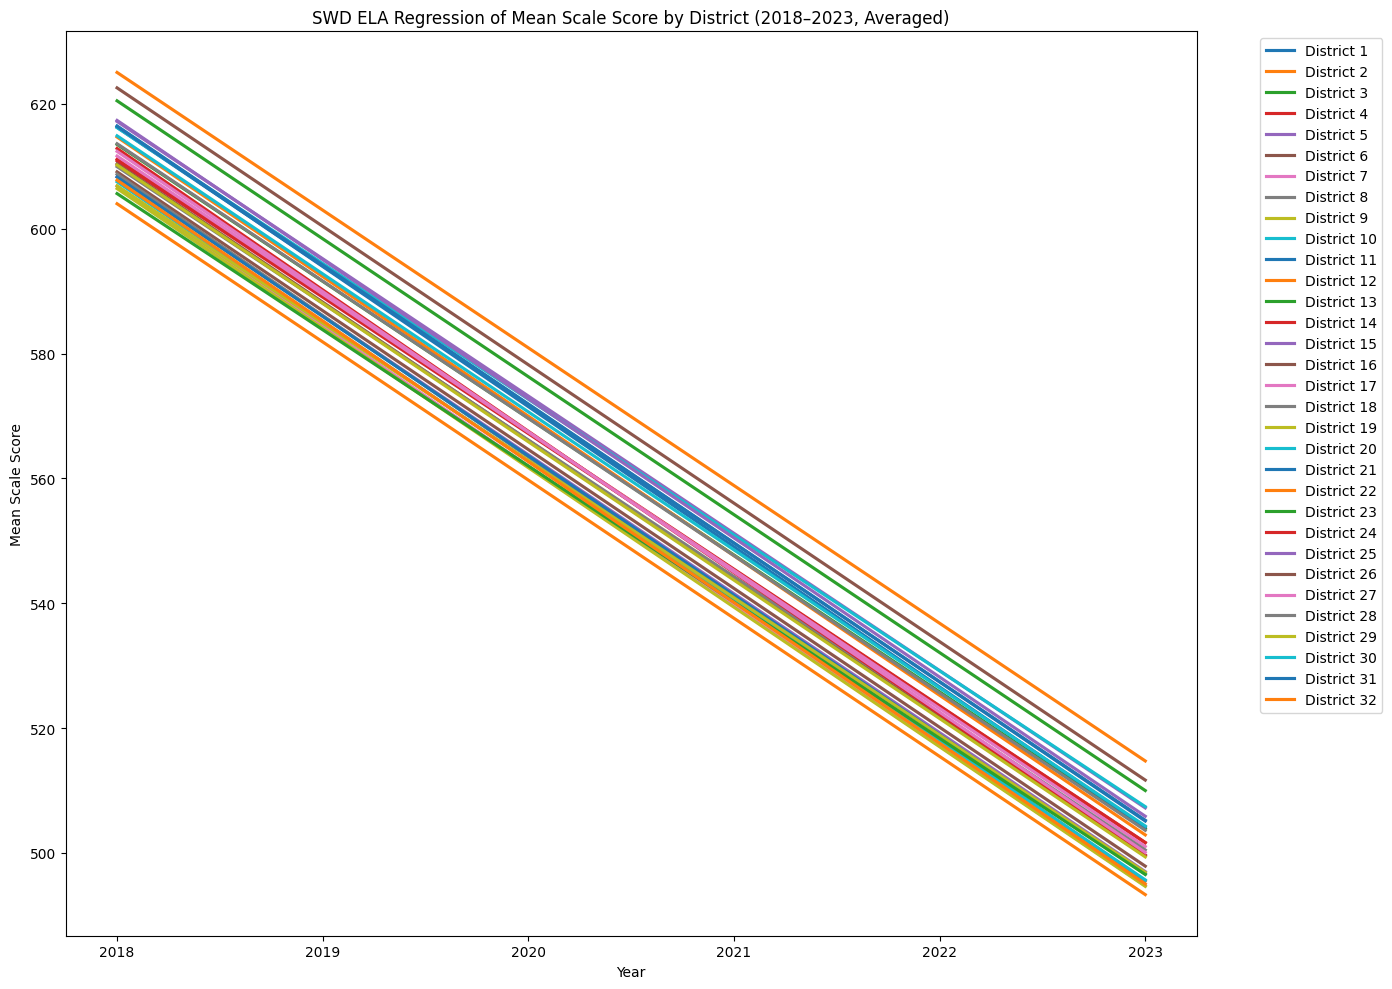

In [ ]:
plt.figure(figsize=(14, 10))
for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("SWD ELA Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### HLM Regression

In [ ]:
ela_swd_df = pd.read_excel("ela.xlsx", sheet_name="SWD")

In [ ]:
ela_swd_df = ela_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])
ela_swd_df = ela_swd_df[ela_swd_df["Grade"] != "All Grades"]

In [ ]:
ela_swd_df["Mean Scale Score"] = pd.to_numeric(ela_swd_df["Mean Scale Score"], errors="coerce")
ela_swd_df = ela_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
ela_swd_df = ela_swd_df[ela_swd_df["Year"].between(2018, 2023)]


hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", ela_swd_df, groups=ela_swd_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:              MixedLM  Dependent Variable:  Q('Mean Scale Score')
No. Observations:   1536     Method:              REML                 
No. Groups:         32       Scale:               2256.5053            
Min. group size:    48       Log-Likelihood:      -8104.8539           
Max. group size:    48       Converged:           Yes                  
Mean group size:    48.0                                               
-----------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------
Intercept          45425.132 1187.921  38.239 0.000 43096.850 47753.414
C(Category)[T.SWD]   -19.286    2.424  -7.956 0.000   -24.037   -14.534
Year                 -22.202    0.588 -37.762 0.000   -23.354   -21.049
Group Var              0.000    0.690                                  
=======================================================================

"""

Year is a strong positive predictor: average ELA scores are increasing over time.

SWD students perform significantly worse than their non-SWD peers, with a consistent gap of nearly 28 points.

The district-level random effect is modest (Group Var = 3.16), indicating some variability across districts, but much of the variation is explained by year and category.



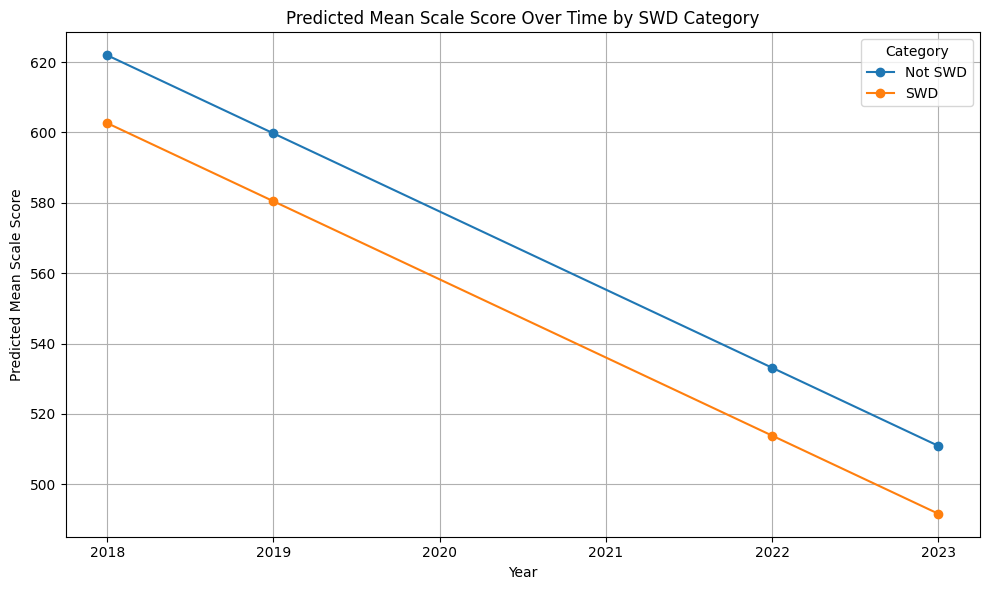

In [ ]:
ela_swd_df["predicted"] = hlm_result.fittedvalues

predicted_trends = ela_swd_df.groupby(["Year", "Category"])["predicted"].mean().reset_index()

plt.figure(figsize=(10, 6))
for category in predicted_trends["Category"].unique():
    subset = predicted_trends[predicted_trends["Category"] == category]
    plt.plot(subset["Year"], subset["predicted"], marker='o', label=category)

plt.title("Predicted Mean Scale Score Over Time by SWD Category")
plt.xlabel("Year")
plt.ylabel("Predicted Mean Scale Score")
plt.grid(True)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

#### HLM Regression Interaction

In [ ]:
ela_swd_df = pd.read_excel("ela.xlsx", sheet_name="SWD")
ela_swd_df = ela_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])
ela_swd_df = ela_swd_df[ela_swd_df["Grade"] != "All Grades"]
# Prepare the data
ela_swd_df["Mean Scale Score"] = pd.to_numeric(ela_swd_df["Mean Scale Score"], errors="coerce")
ela_swd_df = ela_swd_df[ela_swd_df["Year"].between(2018, 2023)]


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


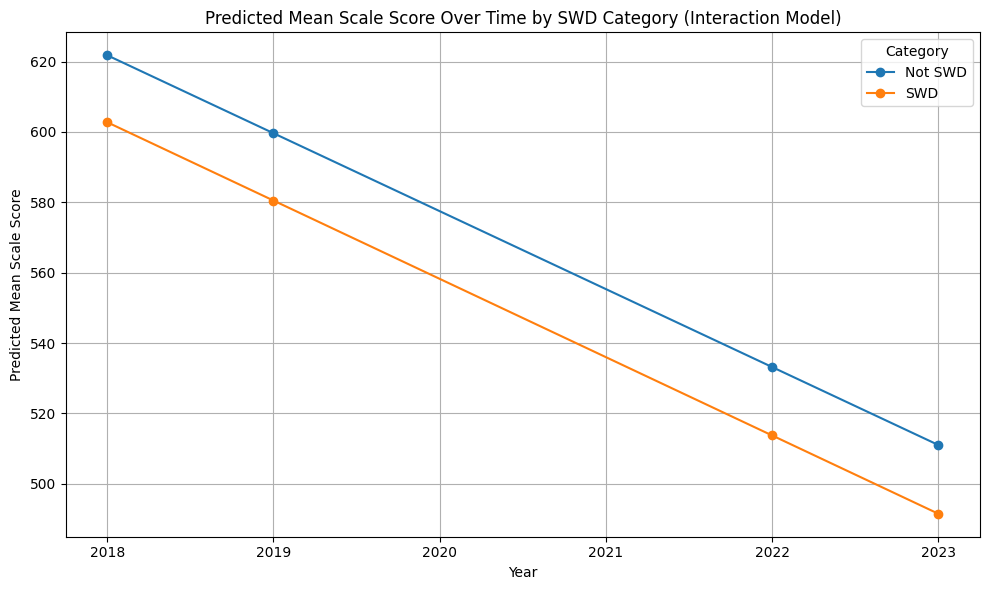

In [ ]:
hlm_swd_interaction_model = smf.mixedlm(
    "Q('Mean Scale Score') ~ Year * C(Category)",
    ela_swd_df,
    groups=ela_swd_df["District"]
)

hlm_swd_interaction_result = hlm_swd_interaction_model.fit()
ela_swd_df["predicted_interaction"] = hlm_swd_interaction_result.fittedvalues

predicted_trends_interaction = ela_swd_df.groupby(["Year", "Category"])["predicted_interaction"].mean().reset_index()

plt.figure(figsize=(10, 6))
for category in predicted_trends_interaction["Category"].unique():
    subset = predicted_trends_interaction[predicted_trends_interaction["Category"] == category]
    plt.plot(subset["Year"], subset["predicted_interaction"], marker='o', label=category)

plt.title("Predicted Mean Scale Score Over Time by SWD Category (Interaction Model)")
plt.xlabel("Year")
plt.ylabel("Predicted Mean Scale Score")
plt.grid(True)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [ ]:
hlm_swd_interaction_result.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:               MixedLM    Dependent Variable:    Q('Mean Scale Score')
No. Observations:    1536       Method:                REML                 
No. Groups:          32         Scale:                 2257.9673            
Min. group size:     48         Log-Likelihood:        -8103.7691           
Max. group size:     48         Converged:             Yes                  
Mean group size:     48.0                                                   
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------
Intercept               45322.952 1680.517  26.970 0.000 42029.200 48616.704
C(Category)[T.SWD]        185.075 2376.610   0.078 0.938 -4472.994  4843.144
Year                      -22.151    0.832 -26.633 0.000   -23.781   -20.521
Year:C(Category)[T.SWD]    -0.101    1.176  -0.086 0.931    -2.407     2.204
Group Var                   0.000    0.692                                  
============================================================================

"""

### Time Series

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:

ela_swd_df = pd.read_excel("ela.xlsx", sheet_name="SWD")

ela_swd_df["Year"] = pd.to_numeric(ela_swd_df["Year"], errors="coerce")

ela_swd_df = ela_swd_df[ela_swd_df["Mean Scale Score"] != 's']
ela_swd_df["Mean Scale Score"] = pd.to_numeric(ela_swd_df["Mean Scale Score"], errors='coerce')

ela_swd_df = ela_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])

swd_ts_data = ela_swd_df[
    (ela_swd_df["Category"] == "SWD") &
    (ela_swd_df["Grade"] == "All Grades") &
    (ela_swd_df["Year"].between(2018, 2020))
].groupby("Year")["Mean Scale Score"].mean()

swd_ts_model = ExponentialSmoothing(swd_ts_data, trend='additive', seasonal=None, initialization_method="estimated")
swd_ts_fit = swd_ts_model.fit()
forecast_2020 = swd_ts_fit.forecast(1)
forecast_2020

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2    582.833829
dtype: float64

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


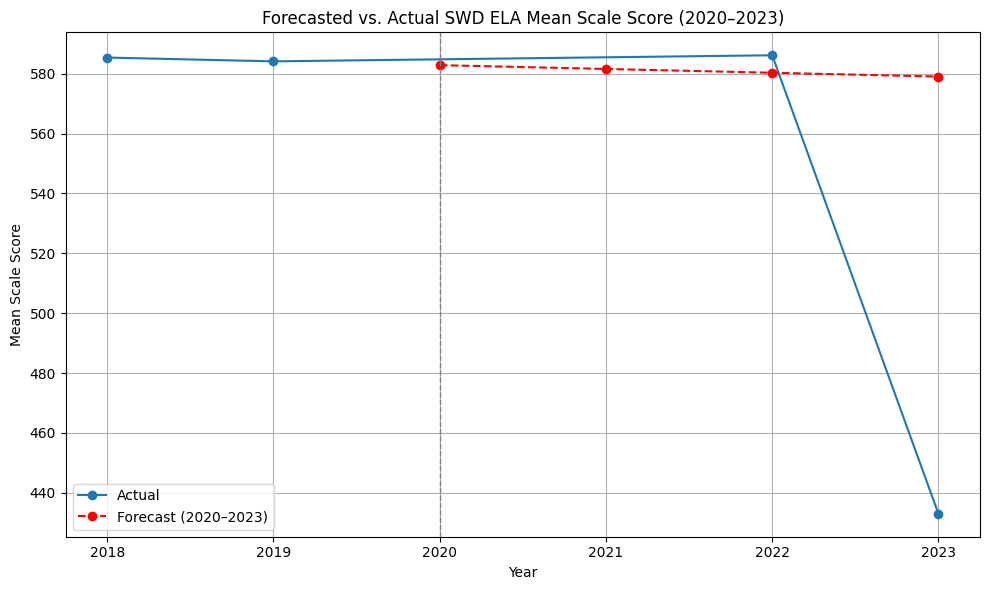

In [ ]:
actual_swd_scores = ela_swd_df[
    (ela_swd_df["Category"] == "SWD") &
    (ela_swd_df["Grade"] == "All Grades") &
    (ela_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = swd_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_swd_scores_full = ela_swd_df[
    (ela_swd_df["Category"] == "SWD") &
    (ela_swd_df["Grade"] == "All Grades") &
    (ela_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_swd_scores_full.index, actual_swd_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual SWD ELA Mean Scale Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


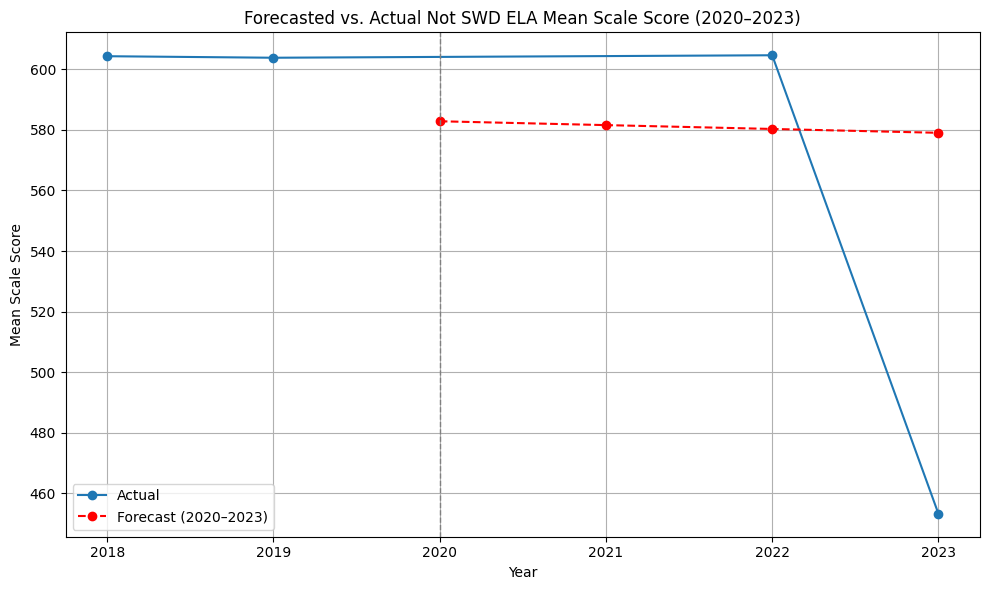

In [ ]:

actual_swd_scores = ela_swd_df[
    (ela_swd_df["Category"] == "Not SWD") &
    (ela_swd_df["Grade"] == "All Grades") &
    (ela_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = swd_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_swd_scores_full = ela_swd_df[
    (ela_swd_df["Category"] == "Not SWD") &
    (ela_swd_df["Grade"] == "All Grades") &
    (ela_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_swd_scores_full.index, actual_swd_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual Not SWD ELA Mean Scale Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Math

In [ ]:
math_swd_df=pd.read_excel("math.xlsx",sheet_name="SWD")
math_swd_df


District       Grade  Year Category  Number Tested  Mean Scale Score  \
0            1           3  2023  Not SWD            464        459.021545   
1            1           3  2023      SWD            111        433.621613   
2            1           4  2023  Not SWD            450        459.260010   
3            1           4  2023      SWD             87        432.264374   
4            1           5  2023  Not SWD            451        462.452332   
...        ...         ...   ...      ...            ...               ...   
4027        32           7  2013      SWD            221        258.280548   
4028        32           8  2013  Not SWD           1084        289.949249   
4029        32           8  2013      SWD            220        256.272736   
4030        32  All Grades  2013  Not SWD           6229        290.702667   
4031        32  All Grades  2013      SWD           1383        264.519898   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
0            68  14.655172        123  26.508621        124  26.724138   
1            45  40.540539         37  33.333332         22  19.819820   
2            97  21.555555         76  16.888889        141  31.333334   
3            48  55.172413         18  20.689655         19  21.839081   
4           109  24.168514         71  15.742794         93  20.620842   
...         ...        ...        ...        ...        ...        ...   
4027        190  85.972847         30  13.574660          1   0.452489   
4028        472  43.542435        421  38.837639        146  13.468635   
4029        178  80.909088         35  15.909091          5   2.272727   
4030       2627  42.173702       2497  40.086693        876  14.063252   
4031       1050  75.921906        274  19.812002         49   3.543022   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0           149  32.112068          273    58.836208  
1             7   6.306306           29    26.126125  
2           136  30.222221          277    61.555557  
3             2   2.298851           21    24.137932  
4           178  39.467850          271    60.088692  
...         ...        ...          ...          ...  
4027          0   0.000000            1     0.452489  
4028         45   4.151291          191    17.619926  
4029          2   0.909091            7     3.181818  
4030        229   3.676353         1105    17.739605  
4031         10   0.723066           59     4.266088  

[4032 rows x 16 columns]

#### The Best Performing SWD District

In [ ]:
math_swd_only = math_swd_df[math_swd_df["Category"] == "SWD"].copy()
math_swd_only = math_swd_only[math_swd_df["Year"].between(2018, 2023)]

avg_scores_by_district = math_swd_only.groupby("District")["Mean Scale Score"].mean().reset_index()

best_district = avg_scores_by_district.sort_values("Mean Scale Score", ascending=False).head(1)
best_district

<ipython-input-55-9f7df7fe71f5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_swd_only = math_swd_only[math_swd_df["Year"].between(2018, 2023)]


District  Mean Scale Score
1         2        558.556418

#### The Worst Performing SWD District

In [ ]:
worst_district = avg_scores_by_district.sort_values("Mean Scale Score", ascending=True).head(1)
worst_district

District  Mean Scale Score
11        12        539.953573

### ANOVA

In [ ]:
math_swd_df_filtered = math_swd_df[math_swd_df["Year"].between(2018, 2023)].copy()
math_swd_df_filtered["Year Group"] = math_swd_df_filtered["Year"].apply(year_group)

math_swd_df_filtered = math_swd_df_filtered.dropna(subset=["Year Group"])

model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=math_swd_df_filtered).fit()
swd_anova_results = anova_lm(model)
swd_anova_results

df        sum_sq       mean_sq  \
C(Category)                        1.0  1.448367e+05  1.448367e+05   
C(Q('Year Group'))                 1.0  2.633402e+06  2.633402e+06   
C(Category):C(Q('Year Group'))     1.0  3.221880e+01  3.221880e+01   
Residual                        1788.0  4.851399e+06  2.713310e+03   

                                         F         PR(>F)  
C(Category)                      53.380085   4.122118e-13  
C(Q('Year Group'))              970.549413  1.412645e-170  
C(Category):C(Q('Year Group'))    0.011874   9.132389e-01  
Residual                               NaN            NaN

### By District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=math_swd_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df        sum_sq       mean_sq  \
C(District)                       31.0  6.596200e+04  2.127807e+03   
C(Q('Year Group'))                 1.0  2.633402e+06  2.633402e+06   
C(District):C(Q('Year Group'))    31.0  8.735198e+02  2.817806e+01   
Residual                        1728.0  4.929432e+06  2.852681e+03   

                                         F         PR(>F)  
C(District)                       0.745897   8.432058e-01  
C(Q('Year Group'))              923.132308  8.031166e-163  
C(District):C(Q('Year Group'))    0.009878   1.000000e+00  
Residual                               NaN            NaN

### Regression

##### Linear Regression

In [ ]:
math_swd_df=pd.read_excel("math.xlsx",sheet_name="SWD")
math_swd_df

District       Grade  Year Category  Number Tested  Mean Scale Score  \
0            1           3  2023  Not SWD            464        459.021545   
1            1           3  2023      SWD            111        433.621613   
2            1           4  2023  Not SWD            450        459.260010   
3            1           4  2023      SWD             87        432.264374   
4            1           5  2023  Not SWD            451        462.452332   
...        ...         ...   ...      ...            ...               ...   
4027        32           7  2013      SWD            221        258.280548   
4028        32           8  2013  Not SWD           1084        289.949249   
4029        32           8  2013      SWD            220        256.272736   
4030        32  All Grades  2013  Not SWD           6229        290.702667   
4031        32  All Grades  2013      SWD           1383        264.519898   

      # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  % Level 3  \
0            68  14.655172        123  26.508621        124  26.724138   
1            45  40.540539         37  33.333332         22  19.819820   
2            97  21.555555         76  16.888889        141  31.333334   
3            48  55.172413         18  20.689655         19  21.839081   
4           109  24.168514         71  15.742794         93  20.620842   
...         ...        ...        ...        ...        ...        ...   
4027        190  85.972847         30  13.574660          1   0.452489   
4028        472  43.542435        421  38.837639        146  13.468635   
4029        178  80.909088         35  15.909091          5   2.272727   
4030       2627  42.173702       2497  40.086693        876  14.063252   
4031       1050  75.921906        274  19.812002         49   3.543022   

      # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0           149  32.112068          273    58.836208  
1             7   6.306306           29    26.126125  
2           136  30.222221          277    61.555557  
3             2   2.298851           21    24.137932  
4           178  39.467850          271    60.088692  
...         ...        ...          ...          ...  
4027          0   0.000000            1     0.452489  
4028         45   4.151291          191    17.619926  
4029          2   0.909091            7     3.181818  
4030        229   3.676353         1105    17.739605  
4031         10   0.723066           59     4.266088  

[4032 rows x 16 columns]

In [ ]:
math_swd_df["Year"] = pd.to_numeric(math_swd_df["Year"])

math_swd_df = math_swd_df[math_swd_df['Mean Scale Score'] != 's']
math_swd_df['Mean Scale Score'] = pd.to_numeric(math_swd_df['Mean Scale Score'])

math_swd_df = math_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])
math_swd_df = math_swd_df[math_swd_df["Grade"] == "All Grades"]

district_yearly_avg = math_swd_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]


In [ ]:
district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)


In [ ]:
district_regression_df

District  R-squared  Coef (Year)   P-value
0          1   0.496062   -21.781880  0.295684
1          2   0.512537   -21.623848  0.284083
2          3   0.504408   -21.879811  0.289783
3          4   0.503134   -22.413359  0.290681
4          5   0.515688   -22.613442  0.281886
5          6   0.513412   -22.372466  0.283472
6          7   0.518567   -22.636572  0.279884
7          8   0.524600   -22.970344  0.275708
8          9   0.518221   -22.815489  0.280124
9         10   0.516854   -22.782017  0.281075
10        11   0.511669   -22.286062  0.284689
11        12   0.510212   -22.422988  0.285709
12        13   0.510554   -22.272501  0.285469
13        14   0.509209   -21.879156  0.286411
14        15   0.505663   -21.583713  0.288900
15        16   0.513766   -22.351874  0.283225
16        17   0.515358   -22.366587  0.282116
17        18   0.497372   -21.856809  0.294754
18        19   0.507507   -22.220649  0.287604
19        20   0.507113   -21.690519  0.287881
20        21   0.510747   -22.252691  0.285334
21        22   0.509969   -22.132702  0.285879
22        23   0.517097   -22.217708  0.280905
23        24   0.520530   -22.845211  0.278522
24        25   0.510769   -22.076452  0.285319
25        26   0.507243   -21.552262  0.287790
26        27   0.517465   -22.435650  0.280650
27        28   0.505116   -21.953052  0.289285
28        29   0.503522   -22.108648  0.290407
29        30   0.511686   -22.316456  0.284678
30        31   0.507204   -21.819761  0.287818
31        32   0.527744   -23.038547  0.273540

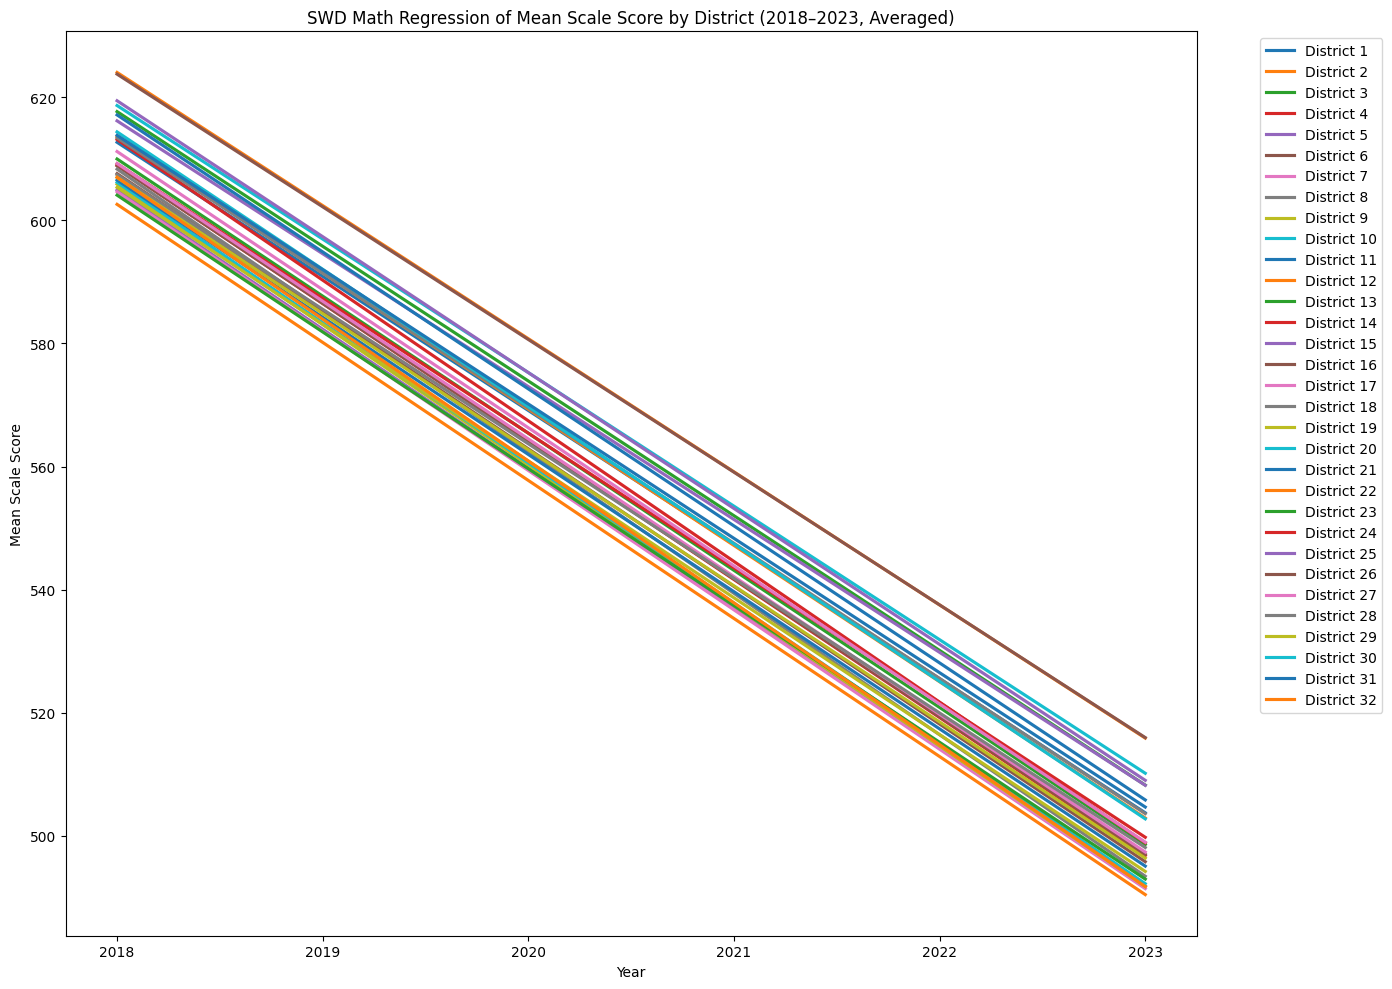

In [ ]:
plt.figure(figsize=(14, 10))

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("SWD Math Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### HLM Regression

In [ ]:
math_swd_df=pd.read_excel("math.xlsx",sheet_name="SWD")
math_swd_df["Year"] = pd.to_numeric(math_swd_df["Year"],errors="coerce")
math_swd_df = math_swd_df[math_swd_df["Year"].between(2018, 2023)]

math_swd_df = math_swd_df[math_swd_df['Mean Scale Score'] != 's']
math_swd_df['Mean Scale Score'] = pd.to_numeric(math_swd_df['Mean Scale Score'])

math_swd_df = math_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])
math_swd_df = math_swd_df[math_swd_df["Grade"] != "All Grades"]

In [ ]:
hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", math_swd_df, groups=math_swd_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:              MixedLM  Dependent Variable:  Q('Mean Scale Score')
No. Observations:   1536     Method:              REML                 
No. Groups:         32       Scale:               2066.6961            
Min. group size:    48       Log-Likelihood:      -8038.6587           
Max. group size:    48       Converged:           Yes                  
Mean group size:    48.0                                               
-----------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------
Intercept          45642.395 1136.861  40.148 0.000 43414.187 47870.602
C(Category)[T.SWD]   -17.946    2.320  -7.736 0.000   -22.493   -13.399
Year                 -22.310    0.563 -39.652 0.000   -23.413   -21.208
Group Var              3.328    0.332                                  
=======================================================================

"""

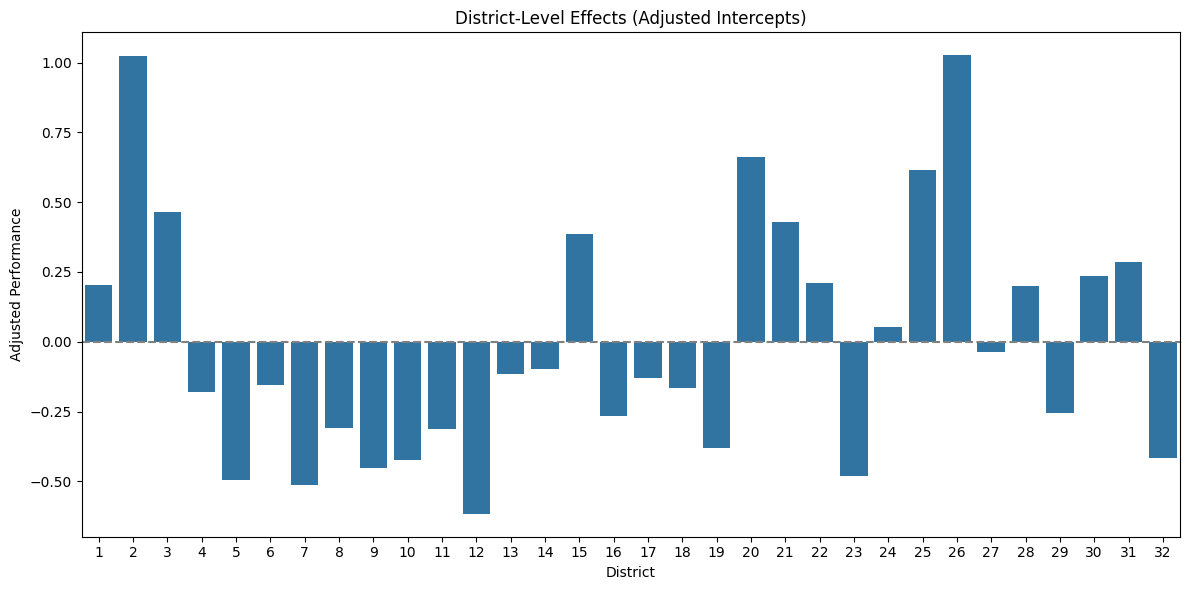

In [ ]:
district_effects = hlm_result.random_effects


district_effects_df = pd.DataFrame.from_dict(district_effects, orient="index")
district_effects_df.columns = ["Random Intercept"]
district_effects_df = district_effects_df.reset_index().rename(columns={"index": "District"})

district_effects_df = district_effects_df.sort_values(by="Random Intercept", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=district_effects_df, x="District", y="Random Intercept")
plt.axhline(0, color="gray", linestyle="--")
plt.title("District-Level Effects (Adjusted Intercepts)")
plt.ylabel("Adjusted Performance")
plt.tight_layout()
plt.show()

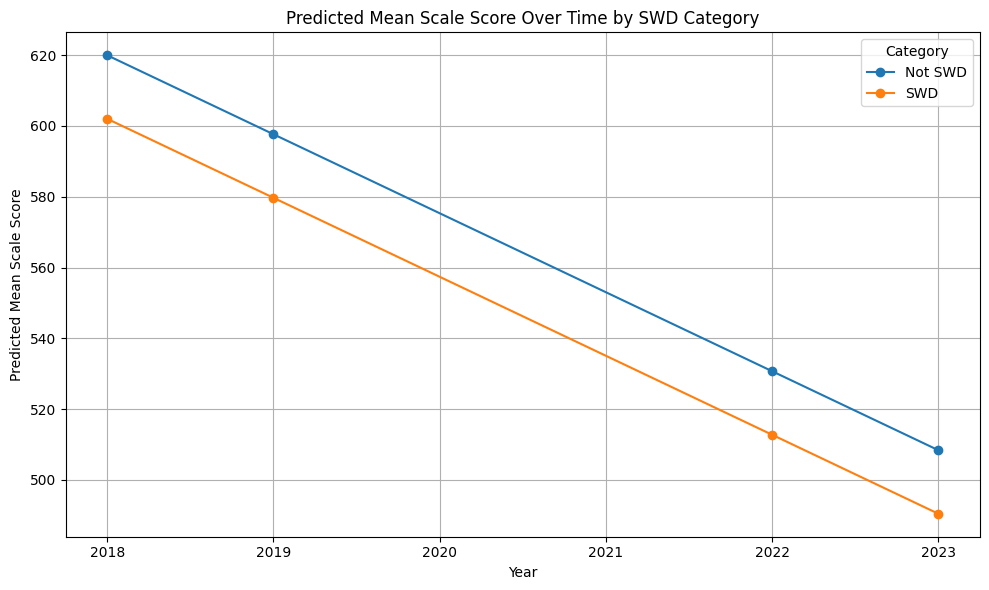

In [ ]:
math_swd_df["predicted"] = hlm_result.fittedvalues

predicted_trends = math_swd_df.groupby(["Year", "Category"])["predicted"].mean().reset_index()

plt.figure(figsize=(10, 6))
for category in predicted_trends["Category"].unique():
    subset = predicted_trends[predicted_trends["Category"] == category]
    plt.plot(subset["Year"], subset["predicted"], marker='o', label=category)

plt.title("Predicted Mean Scale Score Over Time by SWD Category")
plt.xlabel("Year")
plt.ylabel("Predicted Mean Scale Score")
plt.grid(True)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

### Time Series

In [ ]:

math_swd_df = pd.read_excel("math.xlsx", sheet_name="SWD")

math_swd_df["Year"] = pd.to_numeric(math_swd_df["Year"], errors="coerce")

math_swd_df = math_swd_df[math_swd_df["Mean Scale Score"] != 's']
math_swd_df["Mean Scale Score"] = pd.to_numeric(math_swd_df["Mean Scale Score"], errors='coerce')

math_swd_df = math_swd_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])

swd_ts_data = math_swd_df[
    (math_swd_df["Category"] == "SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2020))
].groupby("Year")["Mean Scale Score"].mean()

swd_ts_model = ExponentialSmoothing(swd_ts_data, trend='additive', seasonal=None, initialization_method="estimated")
swd_ts_fit = swd_ts_model.fit()
forecast_2020 = swd_ts_fit.forecast(1)
forecast_2020


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2    586.180884
dtype: float64

#### Mean Scale Score

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


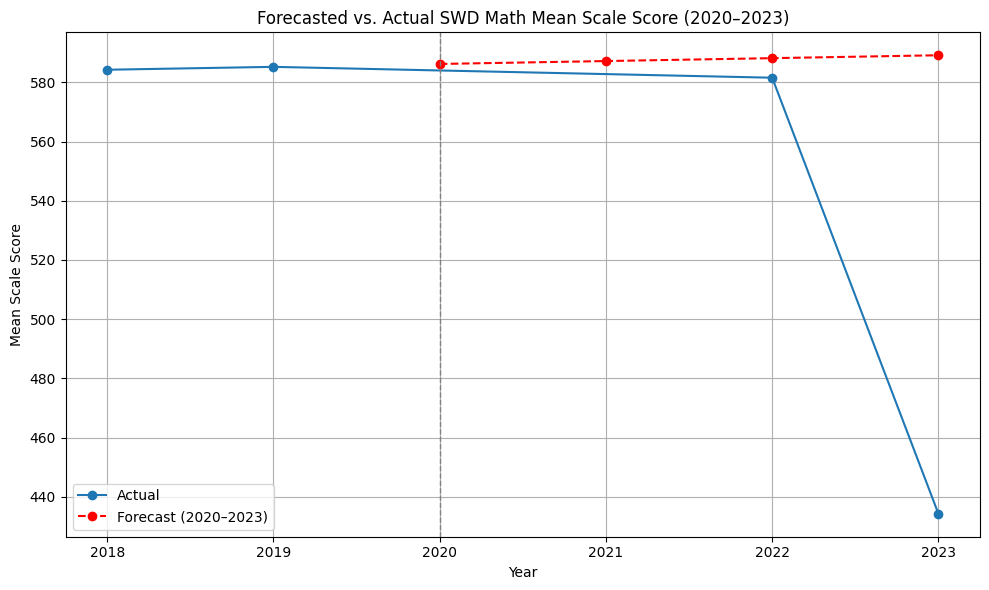

In [ ]:

actual_swd_scores = math_swd_df[
    (math_swd_df["Category"] == "SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = swd_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_swd_scores_full = math_swd_df[
    (math_swd_df["Category"] == "SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_swd_scores_full.index, actual_swd_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual SWD Math Mean Scale Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


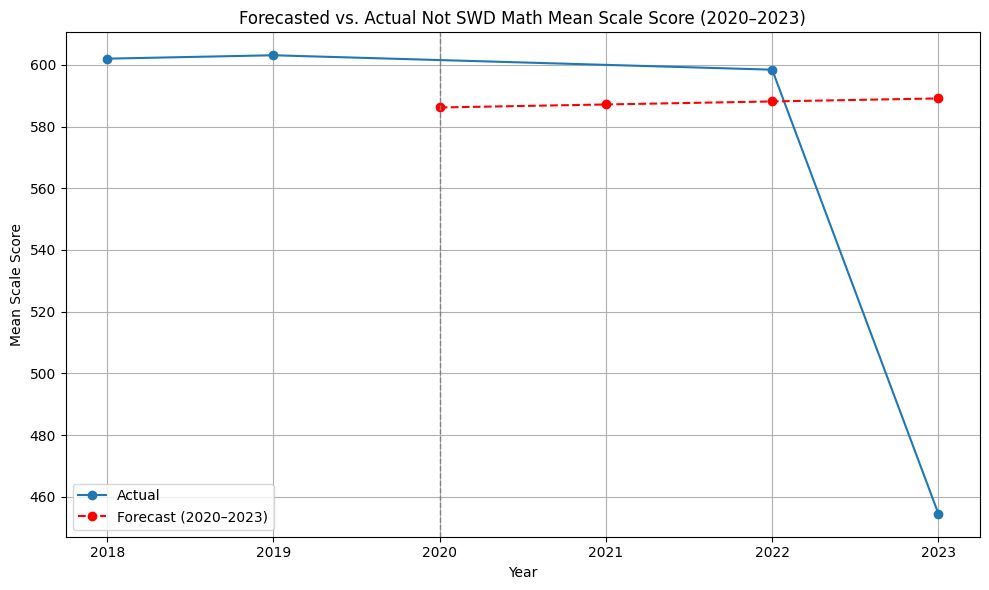

In [ ]:

actual_swd_scores = math_swd_df[
    (math_swd_df["Category"] == "Not SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = swd_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_swd_scores_full = math_swd_df[
    (math_swd_df["Category"] == "Not SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_swd_scores_full.index, actual_swd_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual Not SWD Math Mean Scale Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### % Proficient

In [ ]:

math_swd_df = pd.read_excel("math.xlsx", sheet_name="SWD")
math_swd_df["Year"] = pd.to_numeric(math_swd_df["Year"], errors="coerce")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


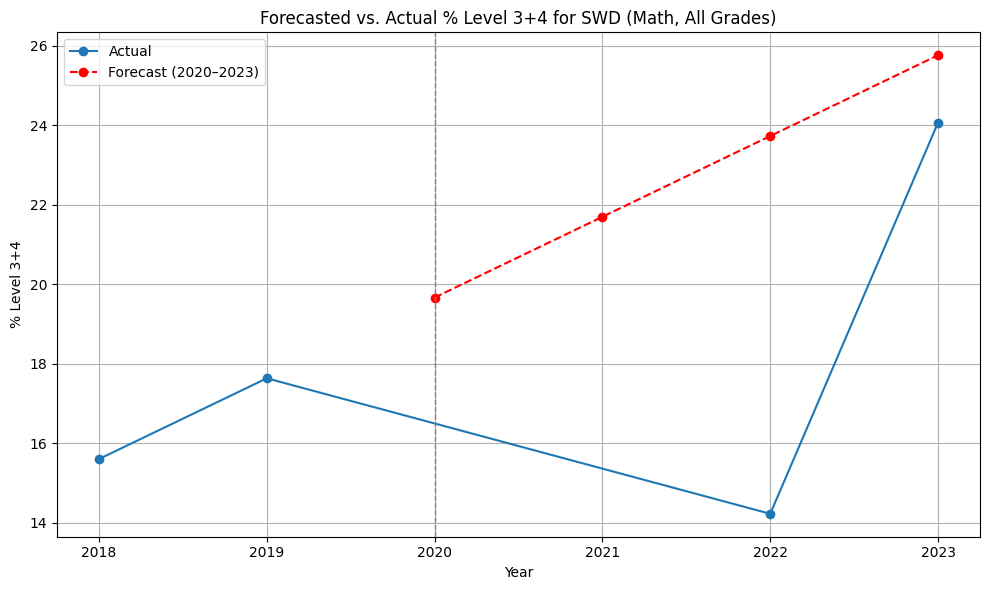

In [ ]:

swd_level_ts = math_swd_df[
    (math_swd_df["Category"] == "SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2019))
].groupby("Year")["% Level 3+4"].mean()

level_model = ExponentialSmoothing(swd_level_ts, trend="additive", seasonal=None, initialization_method="estimated")
level_fit = level_model.fit()

forecast_years = [2020, 2021, 2022, 2023]
level_forecast = level_fit.forecast(len(forecast_years))
forecast_series = pd.Series(level_forecast.values, index=forecast_years)

actual_level_scores = math_swd_df[
    (math_swd_df["Category"] == "SWD") &
    (math_swd_df["Grade"] == "All Grades") &
    (math_swd_df["Year"].between(2018, 2023))
].groupby("Year")["% Level 3+4"].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(actual_level_scores.index, actual_level_scores.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual % Level 3+4 for SWD (Math, All Grades)")
plt.xlabel("Year")
plt.ylabel("% Level 3+4")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ethnicity


## ELA

In [ ]:
ela_ethnicity_df=pd.read_excel("ela.xlsx",sheet_name="Ethnicity")
ela_ethnicity_df

District       Grade  Year         Category  Number Tested  \
0             1           3  2023            Asian            124   
1             1           3  2023            Black             77   
2             1           3  2023         Hispanic            191   
3             1           3  2023     Multi-Racial             32   
4             1           3  2023  Native American              3   
...         ...         ...   ...              ...            ...   
12005        32  All Grades  2013            Black           1719   
12006        32  All Grades  2013         Hispanic           5460   
12007        32  All Grades  2013     Multi-Racial              3   
12008        32  All Grades  2013  Native American             40   
12009        32  All Grades  2013            White            119   

      Mean Scale Score # Level 1  % Level 1 # Level 2  % Level 2 # Level 3  \
0           461.693542        15  12.096774        21  16.935484        36   
1              436.013        36  46.753246        19  24.675325        14   
2           441.942413        61  31.937172        57  29.842932        55   
3                    s         s          s         s          s         s   
4                    s         s          s         s          s         s   
...                ...       ...        ...       ...        ...       ...   
12005       290.706238       719  41.826645       652  37.929028       264   
12006       284.404571      2708  49.597069      1996  36.556778       629   
12007                s         s          s         s          s         s   
12008                s         s          s         s          s         s   
12009                s         s          s         s          s         s   

       % Level 3 # Level 4  % Level 4 # Level 3+4 % Level 3+4  
0      29.032259        52  41.935482          88   70.967743  
1      18.181818         8   10.38961          22   28.571428  
2      28.795811        18   9.424084          73   38.219894  
3              s         s          s           s           s  
4              s         s          s           s           s  
...          ...       ...        ...         ...         ...  
12005  15.357766        84   4.886562         348   20.244328  
12006  11.520146       127   2.326007         756   13.846154  
12007          s         s          s           s           s  
12008          s         s          s           s           s  
12009          s         s          s           s           s  

[12010 rows x 16 columns]

In [ ]:
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Grade"] == "All Grades"].copy()
ela_ethnicity_df

District       Grade  Year         Category  Number Tested  \
36            1  All Grades  2023            Asian            761   
37            1  All Grades  2023            Black            492   
38            1  All Grades  2023         Hispanic           1220   
39            1  All Grades  2023     Multi-Racial            163   
40            1  All Grades  2023  Native American             16   
...         ...         ...   ...              ...            ...   
12005        32  All Grades  2013            Black           1719   
12006        32  All Grades  2013         Hispanic           5460   
12007        32  All Grades  2013     Multi-Racial              3   
12008        32  All Grades  2013  Native American             40   
12009        32  All Grades  2013            White            119   

      Mean Scale Score # Level 1  % Level 1 # Level 2  % Level 2 # Level 3  \
36          468.298279        42   5.519054       101  13.272011       201   
37          440.367889       164  33.333332       164  33.333332       117   
38          445.051636       295  24.180328       414  33.934425       358   
39          471.147247         9   5.521472        12   7.361963        51   
40             444.875         4         25         7      43.75         3   
...                ...       ...        ...       ...        ...       ...   
12005       290.706238       719  41.826645       652  37.929028       264   
12006       284.404571      2708  49.597069      1996  36.556778       629   
12007                s         s          s         s          s         s   
12008                s         s          s         s          s         s   
12009                s         s          s         s          s         s   

       % Level 3 # Level 4  % Level 4 # Level 3+4 % Level 3+4  
36     26.412615       417  54.796322         618   81.208939  
37     23.780487        47   9.552846         164   33.333332  
38     29.344263       153  12.540983         511   41.885246  
39     31.288343        91   55.82822         142   87.116562  
40         18.75         2       12.5           5       31.25  
...          ...       ...        ...         ...         ...  
12005  15.357766        84   4.886562         348   20.244328  
12006  11.520146       127   2.326007         756   13.846154  
12007          s         s          s           s           s  
12008          s         s          s           s           s  
12009          s         s          s           s           s  

[1728 rows x 16 columns]

In [ ]:
ela_ethnicity_df_filtered = ela_ethnicity_df[ela_ethnicity_df["Year"].between(2018, 2023)].copy()

In [ ]:
ela_ethnicity_df_filtered["Year Group"] = ela_ethnicity_df_filtered["Year"].apply(year_group)

ela_ethnicity_df_filtered = ela_ethnicity_df_filtered[ela_ethnicity_df_filtered['Mean Scale Score'] != 's']
ela_ethnicity_df_filtered['Mean Scale Score'] = pd.to_numeric(ela_ethnicity_df_filtered['Mean Scale Score'])


### The best performing Ethnicity

In [ ]:

ethnicity_avg_scores = ela_ethnicity_df_filtered.groupby("Category")["Mean Scale Score"].mean().reset_index()

best_ethnicity_ela = ethnicity_avg_scores.sort_values("Mean Scale Score", ascending=False).head(1)
best_ethnicity_ela

Category  Mean Scale Score
0    Asian        571.902551

In [ ]:
ethnicity_avg_scores

Category  Mean Scale Score
0            Asian        571.902551
1            Black        560.167251
2         Hispanic        558.069618
3     Multi-Racial        567.046324
4  Native American        558.753100
5            White        569.238141

### The worst performing Ethnicty

In [ ]:
worst_ethnicity_ela = ethnicity_avg_scores.sort_values("Mean Scale Score", ascending=True).head(1)
worst_ethnicity_ela

Category  Mean Scale Score
2  Hispanic        558.069618

### ANOVA

In [ ]:
model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=ela_ethnicity_df_filtered).fit()
ethnicty_anova_results = anova_lm(model)
ethnicty_anova_results

df        sum_sq        mean_sq  \
C(Category)                       5.0  2.142689e+04    4285.377573   
C(Q('Year Group'))                1.0  9.787506e+05  978750.581085   
C(Category):C(Q('Year Group'))    5.0  5.004858e+02     100.097162   
Residual                        713.0  2.139694e+06    3000.973702   

                                         F        PR(>F)  
C(Category)                       1.427996  2.119117e-01  
C(Q('Year Group'))              326.144338  2.552853e-60  
C(Category):C(Q('Year Group'))    0.033355  9.994279e-01  
Residual                               NaN           NaN

#### By District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=ela_ethnicity_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df        sum_sq        mean_sq  \
C(District)                      31.0  4.031146e+04    1300.369771   
C(Q('Year Group'))                1.0  9.703936e+05  970393.556481   
C(District):C(Q('Year Group'))   31.0  6.415219e+03     206.942554   
Residual                        661.0  2.123252e+06    3212.181491   

                                         F        PR(>F)  
C(District)                       0.404825  9.985079e-01  
C(Q('Year Group'))              302.097985  5.194041e-56  
C(District):C(Q('Year Group'))    0.064424  1.000000e+00  
Residual                               NaN           NaN

### Regression

In [ ]:
ela_ethnicity_df=pd.read_excel("ela.xlsx",sheet_name="Ethnicity")
ela_ethnicity_df.head(3)

District Grade  Year  Category  Number Tested Mean Scale Score # Level 1  \
0         1     3  2023     Asian            124       461.693542        15   
1         1     3  2023     Black             77          436.013        36   
2         1     3  2023  Hispanic            191       441.942413        61   

   % Level 1 # Level 2  % Level 2 # Level 3  % Level 3 # Level 4  % Level 4  \
0  12.096774        21  16.935484        36  29.032259        52  41.935482   
1  46.753246        19  24.675325        14  18.181818         8   10.38961   
2  31.937172        57  29.842932        55  28.795811        18   9.424084   

  # Level 3+4 % Level 3+4  
0          88   70.967743  
1          22   28.571428  
2          73   38.219894

In [ ]:
ela_ethnicity_df["Year"] = pd.to_numeric(ela_ethnicity_df["Year"])

ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df['Mean Scale Score'] != 's']
ela_ethnicity_df['Mean Scale Score'] = pd.to_numeric(ela_ethnicity_df['Mean Scale Score'])

district_yearly_avg = ela_ethnicity_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]


<ipython-input-86-569b654db312>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ela_ethnicity_df['Mean Scale Score'] = pd.to_numeric(ela_ethnicity_df['Mean Scale Score'])


In [ ]:
district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)


In [ ]:
district_comparison_df = district_regression_df.sort_values(by="R-squared", ascending=False)
district_comparison_df

District  R-squared  Coef (Year)   P-value
0          1   0.498474   -22.283551  0.293973
14        15   0.497299   -22.302116  0.294805
2          3   0.496407   -22.458210  0.295438
22        23   0.495790   -22.284004  0.295877
24        25   0.493235   -22.272720  0.297693
26        27   0.492687   -22.537198  0.298083
10        11   0.491566   -22.243843  0.298882
21        22   0.490792   -22.448329  0.299434
30        31   0.490734   -22.330801  0.299476
7          8   0.490199   -22.520953  0.299858
25        26   0.489480   -22.102668  0.300371
23        24   0.487694   -22.262665  0.301649
29        30   0.487384   -21.981887  0.301871
5          6   0.485978   -22.033435  0.302879
11        12   0.485806   -22.087373  0.303002
12        13   0.484638   -21.753032  0.303841
6          7   0.484215   -22.408576  0.304145
9         10   0.484192   -22.092655  0.304161
20        21   0.484111   -22.322105  0.304219
1          2   0.484058   -21.757198  0.304257
27        28   0.483218   -21.930084  0.304861
28        29   0.482603   -22.161355  0.305303
31        32   0.482406   -22.033221  0.305446
13        14   0.482184   -21.619756  0.305605
4          5   0.479736   -21.697648  0.307370
8          9   0.479069   -22.332674  0.307852
19        20   0.478235   -21.640330  0.308454
3          4   0.476223   -21.744400  0.309911
18        19   0.476189   -21.753603  0.309935
15        16   0.472602   -21.445667  0.312539
17        18   0.470863   -21.782664  0.313806
16        17   0.467053   -21.568039  0.316587

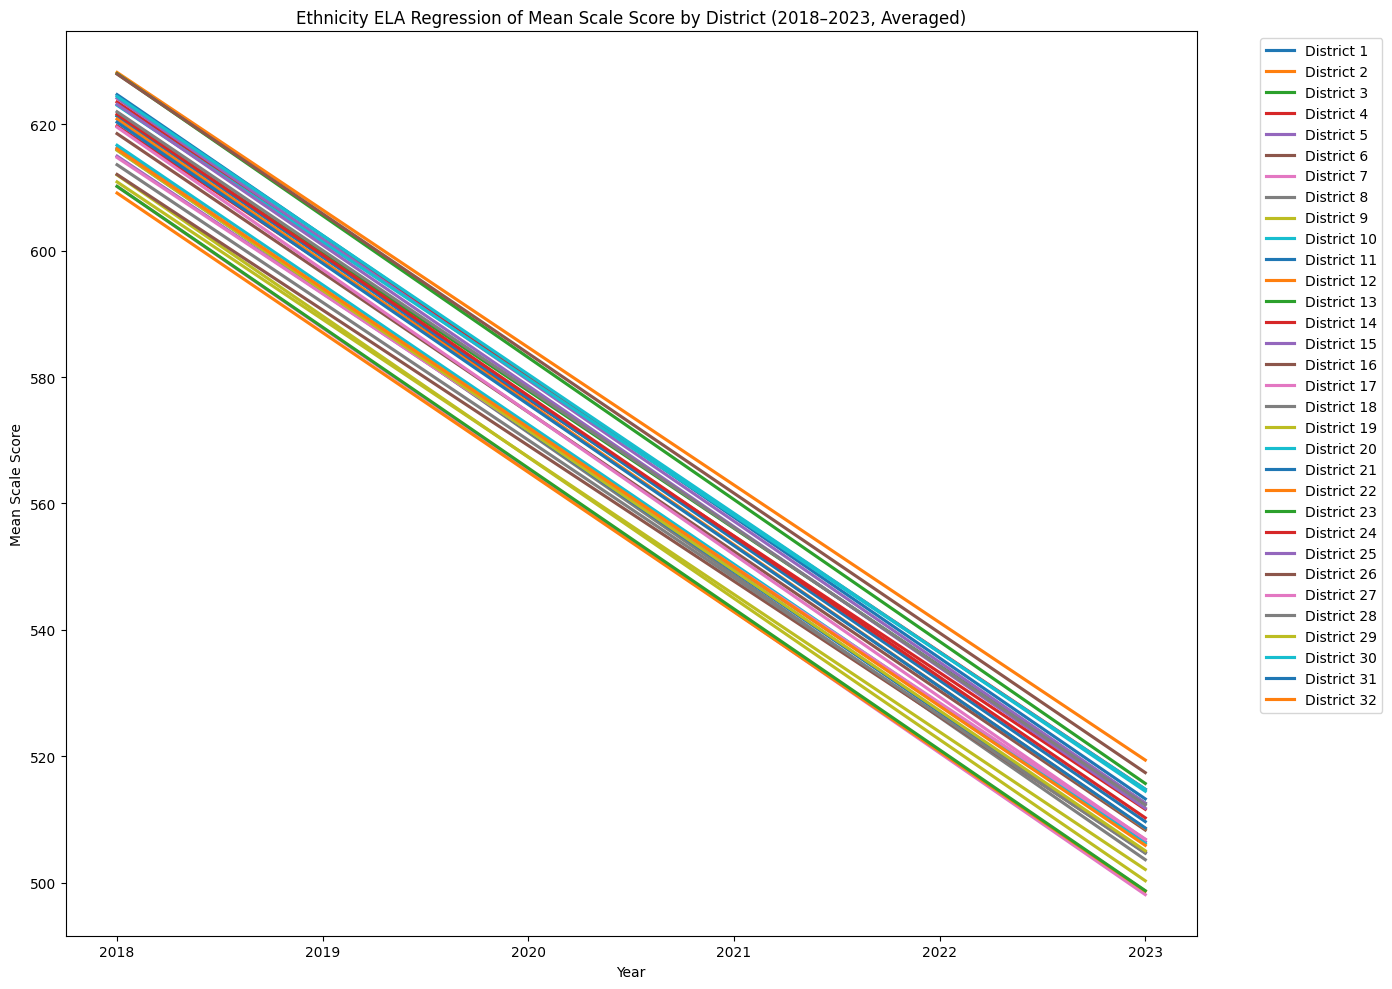

In [ ]:
plt.figure(figsize=(14, 10))

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Ethnicity ELA Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Ethnicity

In [ ]:
ela_ethnicity_df = pd.read_excel("ela.xlsx", sheet_name="Ethnicity")

ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Grade"] == "All Grades"].copy()
ela_ethnicity_df["Year"] = pd.to_numeric(ela_ethnicity_df["Year"], errors="coerce")
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Mean Scale Score"] != "s"]
ela_ethnicity_df["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_df["Mean Scale Score"], errors="coerce")
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Year"].between(2018, 2023)]


In [ ]:
ethnicity_regression_results = []
for group in ela_ethnicity_df["Category"].unique():
    df_group = ela_ethnicity_df[ela_ethnicity_df["Category"] == group]
    model = ols("Q('Mean Scale Score') ~ Year", data=df_group).fit()
    ethnicity_regression_results.append({
        "Ethnicity": group,
        "R-squared": model.rsquared,
        "Coef (Year)": model.params["Year"],
        "P-value": model.pvalues["Year"]
    })

ethnicity_regression_df = pd.DataFrame(ethnicity_regression_results)
ethnicity_regression_df

Ethnicity  R-squared  Coef (Year)       P-value
0            Asian   0.466180   -21.416890  4.643641e-18
1            Black   0.469181   -21.540824  1.261262e-18
2         Hispanic   0.487828   -22.396783  4.971272e-20
3     Multi-Racial   0.464910   -22.588671  2.614049e-17
4  Native American   0.473746   -22.511077  3.653492e-17
5            White   0.458836   -21.222036  1.979228e-17

#### HLM Regression

In [ ]:
ela_ethnicity_df["Year"] = pd.to_numeric(ela_ethnicity_df["Year"], errors="coerce")
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Mean Scale Score"] != "s"]
ela_ethnicity_df["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_df["Mean Scale Score"], errors="coerce")
ela_ethnicity_df = ela_ethnicity_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Year"].between(2018, 2023)]

hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", ela_ethnicity_df, groups=ela_ethnicity_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM      Dependent Variable:      Q('Mean Scale Score')
No. Observations:       725          Method:                  REML                 
No. Groups:             32           Scale:                   2301.9525            
Min. group size:        20           Log-Likelihood:          -3816.3927           
Max. group size:        24           Converged:               Yes                  
Mean group size:        22.7                                                       
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                      44891.668 1755.799  25.568 0.000 41450.365 48332.971
C(Category)[T.Black]             -12.152    6.105  -1.991 0.047   -24.117    -0.188
C(Category)[T.Hispanic]          -12.934    6.071  -2.131 0.033   -24.832    -1.036
C(Category)[T.Multi-Racial]       -0.864    6.208  -0.139 0.889   -13.031    11.303
C(Category)[T.Native American]   -10.018    6.262  -1.600 0.110   -22.291     2.255
C(Category)[T.White]              -2.131    6.166  -0.346 0.730   -14.216     9.954
Year                             -21.935    0.869 -25.242 0.000   -23.639   -20.232
Group Var                          0.000                                           
===================================================================================

"""

#### HLM Regression with Interaction

In [ ]:
ela_ethnicity_df["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_df["Mean Scale Score"], errors="coerce")
ela_ethnicity_df = ela_ethnicity_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["Year"].between(2018, 2023)]

hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year * C(Category)", ela_ethnicity_df, groups=ela_ethnicity_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
=========================================================================================
Model:                    MixedLM        Dependent Variable:        Q('Mean Scale Score')
No. Observations:         725            Method:                    REML                 
No. Groups:               32             Scale:                     2316.7520            
Min. group size:          20             Log-Likelihood:            -3806.9048           
Max. group size:          24             Converged:                 Yes                  
Mean group size:          22.7                                                           
-----------------------------------------------------------------------------------------
                                      Coef.   Std.Err.    z    P>|z|   [0.025     0.975] 
-----------------------------------------------------------------------------------------
Intercept                           43843.851 4285.777  10.230 0.000  35443.883 52243.820
C(Category)[T.Black]                  238.258 6034.100   0.039 0.969 -11588.360 12064.876
C(Category)[T.Hispanic]              1966.919 5979.452   0.329 0.742  -9752.592 13686.430
C(Category)[T.Multi-Racial]          2366.790 6151.172   0.385 0.700  -9689.285 14422.865
C(Category)[T.Native American]       2200.824 6207.826   0.355 0.723  -9966.291 14367.940
C(Category)[T.White]                 -395.844 6074.918  -0.065 0.948 -12302.464 11510.777
Year                                  -21.417    2.121 -10.097 0.000    -25.574   -17.259
Year:C(Category)[T.Black]              -0.124    2.987  -0.041 0.967     -5.977     5.730
Year:C(Category)[T.Hispanic]           -0.980    2.959  -0.331 0.741     -6.780     4.820
Year:C(Category)[T.Multi-Racial]       -1.172    3.044  -0.385 0.700     -7.139     4.795
Year:C(Category)[T.Native American]    -1.094    3.072  -0.356 0.722     -7.116     4.928
Year:C(Category)[T.White]               0.195    3.007   0.065 0.948     -5.698     6.088
Group Var                               0.000                                            
=========================================================================================

"""

### Time Series


#### Mean Scale Score

In [ ]:
ela_ethnicity_df = pd.read_excel("ela.xlsx", sheet_name="Ethnicity")
ela_ethnicity_df["Year"] = pd.to_numeric(ela_ethnicity_df["Year"], errors="coerce")

ela_ethnicity_df = math_swd_df[ela_ethnicity_df["Mean Scale Score"] != 's']
ela_ethnicity_df["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_df["Mean Scale Score"], errors='coerce')

ela_ethnicity_df = ela_ethnicity_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category", "Grade"])

ethnicity_ts_data = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2020))
].groupby("Year")["Mean Scale Score"].mean()

swd_ts_model = ExponentialSmoothing(ethnicity_ts_data, trend='additive', seasonal=None, initialization_method="estimated")
swd_ts_fit = swd_ts_model.fit()


<ipython-input-94-8c54df40c789>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ela_ethnicity_df = math_swd_df[ela_ethnicity_df["Mean Scale Score"] != 's']
<ipython-input-94-8c54df40c789>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ela_ethnicity_df["Mean Scale Score"] = pd.to_numeric(ela_ethnicity_df["Mean Scale Score"], errors='coerce')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


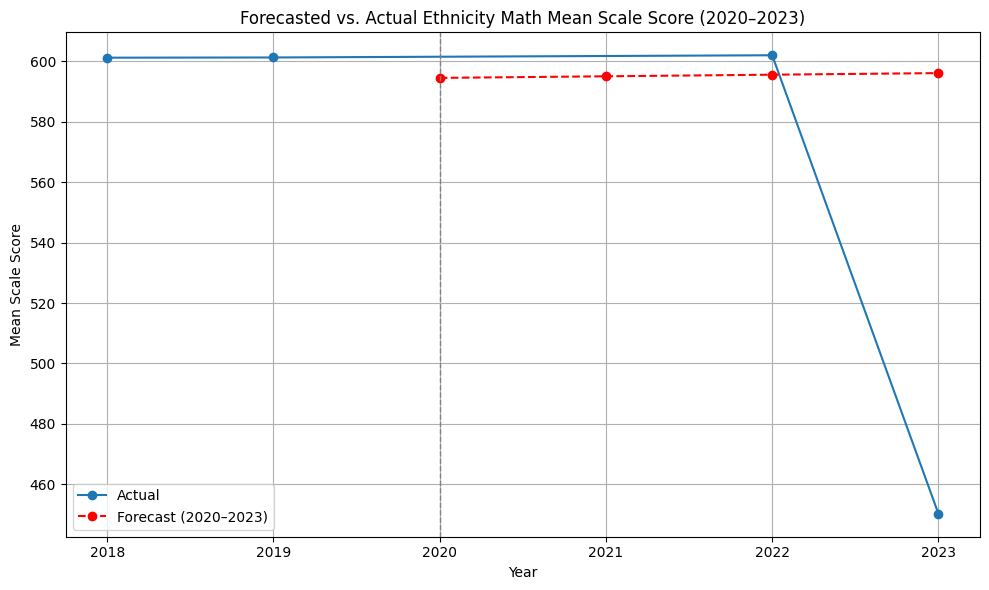

In [ ]:
actual_ethnicty_scores = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = swd_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_ethnicty_scores_full = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2023))
].groupby("Year")["Mean Scale Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_ethnicty_scores_full.index, actual_ethnicty_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual Ethnicity Math Mean Scale Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
common_years = forecast_series.index.intersection(actual_ethnicty_scores.index)
forecast_aligned = forecast_series[common_years]
actual_aligned = actual_ethnicty_scores[common_years]

mae = mean_absolute_error(actual_aligned, forecast_aligned)
rmse = np.sqrt(mean_squared_error(actual_aligned, forecast_aligned))
mape = np.mean(np.abs((actual_aligned - forecast_aligned) / actual_aligned)) * 100

mae, rmse, mape

(76.17131758389749,
 np.float64(103.27255858439972),
 np.float64(16.738835966636557))

#### % Proficient

In [ ]:
ela_ethnicity_df = pd.read_excel("ela.xlsx", sheet_name="Ethnicity")

ela_ethnicity_df["Year"] = pd.to_numeric(ela_ethnicity_df["Year"], errors="coerce")

ela_ethnicity_df = ela_ethnicity_df[ela_ethnicity_df["% Level 3+4"] != 's']
ela_ethnicity_df["% Level 3+4"] = pd.to_numeric(ela_ethnicity_df["% Level 3+4"], errors='coerce')

ela_ethnicity_df = ela_ethnicity_df.dropna(subset=["% Level 3+4", "District", "Year", "Category", "Grade"])

ethnicity_ts_data = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2020))
].groupby("Year")["% Level 3+4"].mean()

ethnicity_ts_model = ExponentialSmoothing(ethnicity_ts_data, trend='additive', seasonal=None, initialization_method="estimated")
ethnicity_ts_fit = ethnicity_ts_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


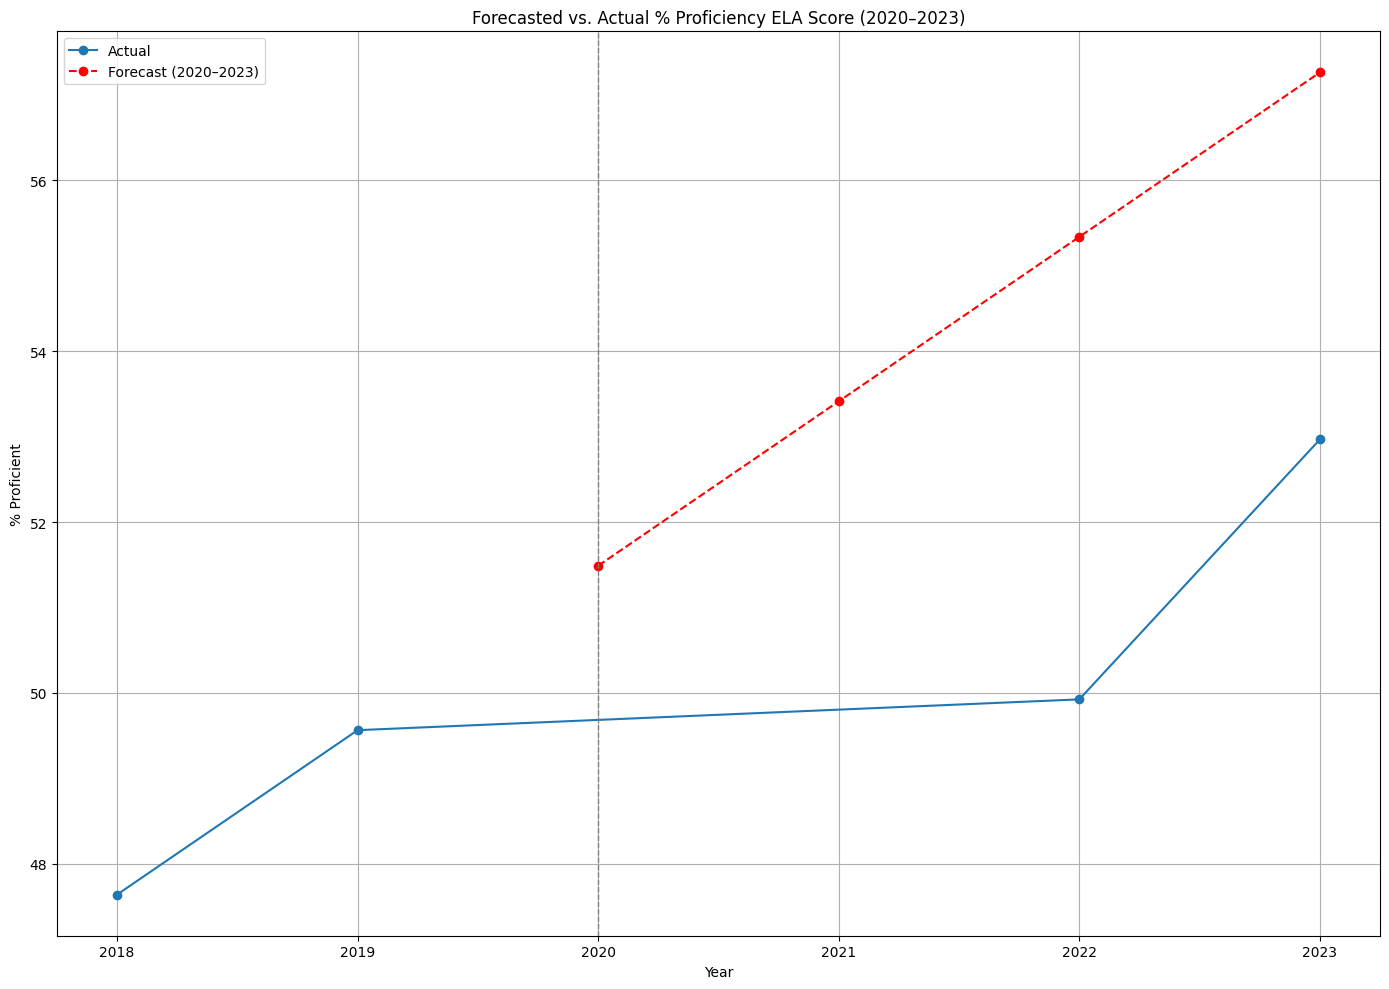

In [ ]:
actual_ethnicty_scores = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2023))
].groupby("Year")["% Level 3+4"].mean()

forecast_years = [2020, 2021, 2022, 2023]
forecast_values = ethnicity_ts_fit.forecast(len(forecast_years))
forecast_series = pd.Series(forecast_values.values, index=forecast_years)

actual_ethnicty_scores_full = ela_ethnicity_df[
    (ela_ethnicity_df["Grade"] == "All Grades") &
    (ela_ethnicity_df["Year"].between(2018, 2023))
].groupby("Year")["% Level 3+4"].mean()

# Plot
plt.figure(figsize=(14, 10))
plt.plot(actual_ethnicty_scores_full.index, actual_ethnicty_scores_full.values, marker='o', label="Actual")
plt.plot(forecast_series.index, forecast_series.values, marker='o', linestyle='--', color='red', label="Forecast (2020–2023)")
plt.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
plt.title("Forecasted vs. Actual % Proficiency ELA Score (2020–2023)")
plt.xlabel("Year")
plt.ylabel("% Proficient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Math

In [ ]:
math_ethnicity_df=pd.read_excel("math.xlsx",sheet_name="Ethnicity")
math_ethnicity_df

District       Grade  Year         Category  Number Tested  \
0             1           3  2023            Asian            124   
1             1           3  2023            Black             80   
2             1           3  2023         Hispanic            235   
3             1           3  2023     Multi-Racial             34   
4             1           3  2023  Native American              4   
...         ...         ...   ...              ...            ...   
12000        32  All Grades  2013            Black           1718   
12001        32  All Grades  2013         Hispanic           5559   
12002        32  All Grades  2013     Multi-Racial              3   
12003        32  All Grades  2013  Native American             40   
12004        32  All Grades  2013            White            121   

      Mean Scale Score # Level 1  % Level 1 # Level 2  % Level 2 # Level 3  \
0           479.903229         3   2.419355        13  10.483871        30   
1           434.450012        32         40        27      33.75        13   
2           437.017029        70  29.787233        96  40.851063        62   
3                    s         s          s         s          s         s   
4                    s         s          s         s          s         s   
...                ...       ...        ...       ...        ...       ...   
12000       286.915588       818  47.613503       626  36.437717       219   
12001       284.790619      2750   49.46933      2023  36.391438       639   
12002                s         s          s         s          s         s   
12003                s         s          s         s          s         s   
12004                s         s          s         s          s         s   

       % Level 3 # Level 4  % Level 4 # Level 3+4 % Level 3+4  
0      24.193548        78  62.903225         108   87.096771  
1          16.25         8         10          21       26.25  
2      26.382978         7   2.978723          69   29.361702  
3              s         s          s           s           s  
4              s         s          s           s           s  
...          ...       ...        ...         ...         ...  
12000   12.74738        55   3.201397         274   15.948777  
12001  11.494873       147   2.644361         786   14.139234  
12002          s         s          s           s           s  
12003          s         s          s           s           s  
12004          s         s          s           s           s  

[12005 rows x 16 columns]

In [ ]:
math_ethnicity_df = math_ethnicity_df[math_ethnicity_df["Grade"] == "All Grades"].copy()
math_ethnicity_df

District       Grade  Year         Category  Number Tested  \
36            1  All Grades  2023            Asian            653   
37            1  All Grades  2023            Black            446   
38            1  All Grades  2023         Hispanic           1294   
39            1  All Grades  2023     Multi-Racial            155   
40            1  All Grades  2023  Native American             16   
...         ...         ...   ...              ...            ...   
12000        32  All Grades  2013            Black           1718   
12001        32  All Grades  2013         Hispanic           5559   
12002        32  All Grades  2013     Multi-Racial              3   
12003        32  All Grades  2013  Native American             40   
12004        32  All Grades  2013            White            121   

      Mean Scale Score # Level 1  % Level 1 # Level 2  % Level 2 # Level 3  \
36          483.352234        19   2.909648        50   7.656968       175   
37           437.30719       196   43.94619       118  26.457399       101   
38          439.722565       494  38.176197       366  28.284389       351   
39          479.290314         9   5.806452        19  12.258064        32   
40               442.5         4         25         6       37.5         4   
...                ...       ...        ...       ...        ...       ...   
12000       286.915588       818  47.613503       626  36.437717       219   
12001       284.790619      2750   49.46933      2023  36.391438       639   
12002                s         s          s         s          s         s   
12003                s         s          s         s          s         s   
12004                s         s          s         s          s         s   

       % Level 3 # Level 4  % Level 4 # Level 3+4 % Level 3+4  
36     26.799387       409  62.633995         584   89.433388  
37     22.645741        31   6.950673         132   29.596413  
38     27.125193        83   6.414219         434   33.539413  
39     20.645161        95  61.290321         127   81.935486  
40            25         2       12.5           6        37.5  
...          ...       ...        ...         ...         ...  
12000   12.74738        55   3.201397         274   15.948777  
12001  11.494873       147   2.644361         786   14.139234  
12002          s         s          s           s           s  
12003          s         s          s           s           s  
12004          s         s          s           s           s  

[1728 rows x 16 columns]

In [ ]:
math_ethnicity_df_filtered = math_ethnicity_df[math_ethnicity_df["Year"].between(2018, 2023)].copy()

In [ ]:
math_ethnicity_df_filtered["Year Group"] = math_ethnicity_df_filtered["Year"].apply(year_group)
math_ethnicity_df_filtered = math_ethnicity_df_filtered[math_ethnicity_df_filtered['Mean Scale Score'] != 's']
math_ethnicity_df_filtered['Mean Scale Score'] = pd.to_numeric(math_ethnicity_df_filtered['Mean Scale Score'])


### The best performing Ethnicity

In [ ]:
ethnicity_avg_scores = math_ethnicity_df_filtered.groupby("Category")["Mean Scale Score"].mean().reset_index()
ethnicity_avg_scores

Category  Mean Scale Score
0            Asian        576.800646
1            Black        554.818222
2         Hispanic        555.250055
3     Multi-Racial        568.411191
4  Native American        557.800071
5            White        568.902768

In [ ]:
best_ethnicity_math = ethnicity_avg_scores.sort_values("Mean Scale Score", ascending=False).head(1)
best_ethnicity_math

Category  Mean Scale Score
0    Asian        576.800646

### The worst performing Ethnicity

In [ ]:
worst_ethnicity_math = ethnicity_avg_scores.sort_values("Mean Scale Score", ascending=True).head(1)
worst_ethnicity_math

Category  Mean Scale Score
1    Black        554.818222

### ANOVA

In [ ]:
model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=math_ethnicity_df_filtered).fit()
ethnicty_anova_results = anova_lm(model)
ethnicty_anova_results

df        sum_sq        mean_sq  \
C(Category)                       5.0  4.914187e+04    9828.373306   
C(Q('Year Group'))                1.0  9.589349e+05  958934.888022   
C(Category):C(Q('Year Group'))    5.0  1.770736e+03     354.147222   
Residual                        696.0  1.865287e+06    2680.010676   

                                         F        PR(>F)  
C(Category)                       3.667289  2.778389e-03  
C(Q('Year Group'))              357.810100  1.048450e-64  
C(Category):C(Q('Year Group'))    0.132144  9.849978e-01  
Residual                               NaN           NaN

### District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=math_ethnicity_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df        sum_sq        mean_sq  \
C(District)                      31.0  4.061113e+04    1310.036429   
C(Q('Year Group'))                1.0  9.530618e+05  953061.831026   
C(District):C(Q('Year Group'))   31.0  9.197740e+03     296.701303   
Residual                        644.0  1.872264e+06    2907.242579   

                                         F        PR(>F)  
C(District)                       0.450611  9.959381e-01  
C(Q('Year Group'))              327.823291  1.549277e-59  
C(District):C(Q('Year Group'))    0.102056  1.000000e+00  
Residual                               NaN           NaN

### Regression

In [ ]:
math_ethnicity_df["Year"] = pd.to_numeric(math_ethnicity_df["Year"])

math_ethnicity_df = math_ethnicity_df[math_ethnicity_df['Mean Scale Score'] != 's']
math_ethnicity_df['Mean Scale Score'] = pd.to_numeric(math_ethnicity_df['Mean Scale Score'])

district_yearly_avg = math_ethnicity_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]


<ipython-input-107-9479e63cb5c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_ethnicity_df['Mean Scale Score'] = pd.to_numeric(math_ethnicity_df['Mean Scale Score'])


In [ ]:
district_regression_results = []

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)


In [ ]:
district_comparison_df = district_regression_df.sort_values(by="R-squared", ascending=False)
district_comparison_df

District  R-squared  Coef (Year)   P-value
31        32   0.536603   -23.493426  0.267468
7          8   0.527630   -22.736481  0.273618
1          2   0.524869   -21.300857  0.275521
22        23   0.524035   -22.564433  0.276097
24        25   0.520357   -22.343042  0.278642
12        13   0.519071   -22.284101  0.279534
26        27   0.518447   -22.310783  0.279967
21        22   0.518215   -22.392842  0.280129
23        24   0.517710   -22.116593  0.280479
14        15   0.517554   -21.885376  0.280587
10        11   0.514381   -21.995650  0.282797
30        31   0.514253   -22.022602  0.282886
11        12   0.513655   -22.603312  0.283303
29        30   0.512693   -21.853889  0.283974
8          9   0.511791   -22.585813  0.284604
5          6   0.511372   -21.772655  0.284897
6          7   0.511321   -22.822589  0.284933
2          3   0.510046   -22.555869  0.285825
28        29   0.508808   -22.227026  0.286692
9         10   0.508393   -21.988041  0.286983
25        26   0.507889   -21.743664  0.287337
20        21   0.507761   -22.097494  0.287426
13        14   0.507383   -21.635023  0.287692
16        17   0.506884   -22.153416  0.288042
18        19   0.505617   -22.029634  0.288933
4          5   0.505592   -22.575889  0.288950
27        28   0.505585   -22.102119  0.288955
19        20   0.505477   -20.847149  0.289031
17        18   0.502621   -21.850689  0.291043
15        16   0.496807   -21.551165  0.295155
0          1   0.493813   -21.194098  0.297282
3          4   0.492953   -21.415484  0.297894

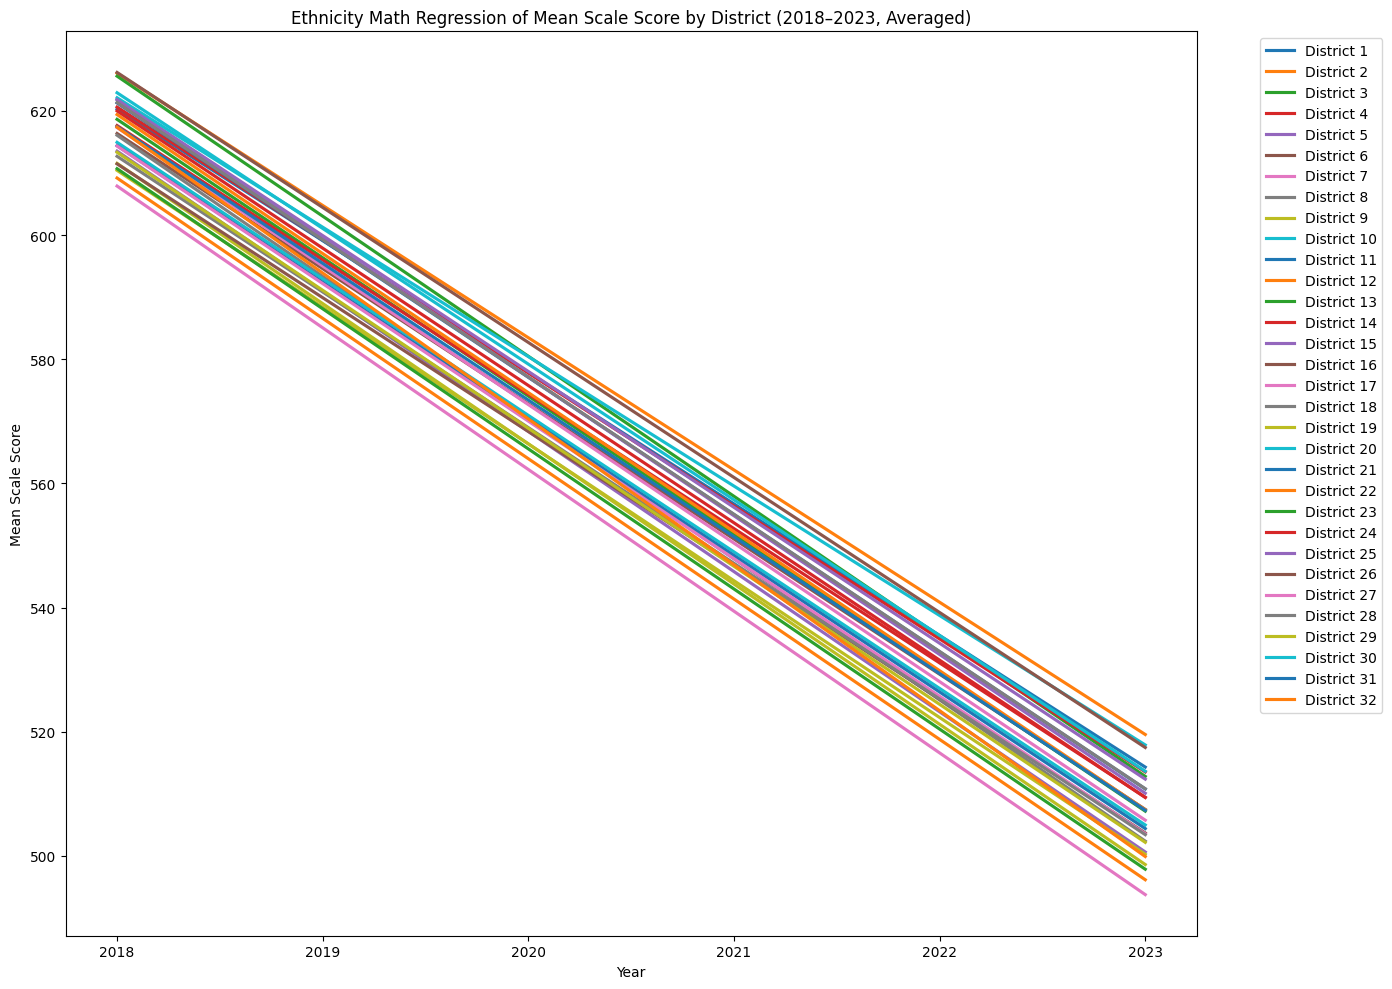

In [ ]:
plt.figure(figsize=(14, 10))

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Ethnicity Math Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### HLM Regression

In [ ]:
math_ethnicity_df["Mean Scale Score"] = pd.to_numeric(math_ethnicity_df["Mean Scale Score"], errors="coerce")
math_ethnicity_df = math_ethnicity_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
math_ethnicity_df = math_ethnicity_df[math_ethnicity_df["Year"].between(2018, 2023)]

hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", math_ethnicity_df, groups=math_ethnicity_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

<ipython-input-111-80969f01ee91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_ethnicity_df["Mean Scale Score"] = pd.to_numeric(math_ethnicity_df["Mean Scale Score"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM      Dependent Variable:      Q('Mean Scale Score')
No. Observations:       708          Method:                  REML                 
No. Groups:             32           Scale:                   2047.2351            
Min. group size:        18           Log-Likelihood:          -3685.2768           
Max. group size:        24           Converged:               Yes                  
Mean group size:        22.1                                                       
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                      44351.135 1679.180  26.412 0.000 41060.004 47642.267
C(Category)[T.Black]             -20.783    5.757  -3.610 0.000   -32.066    -9.500
C(Category)[T.Hispanic]          -19.491    5.737  -3.397 0.001   -30.736    -8.247
C(Category)[T.Multi-Racial]       -5.635    5.956  -0.946 0.344   -17.308     6.038
C(Category)[T.Native American]   -15.451    5.963  -2.591 0.010   -27.138    -3.763
C(Category)[T.White]              -6.498    5.885  -1.104 0.270   -18.033     5.037
Year                             -21.666    0.831 -26.069 0.000   -23.295   -20.037
Group Var                          0.000                                           
===================================================================================

"""

##### HLM with Interaction

In [ ]:
math_ethnicity_df["Mean Scale Score"] = pd.to_numeric(math_ethnicity_df["Mean Scale Score"], errors="coerce")
math_ethnicity_df = math_ethnicity_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
math_ethnicity_df = math_ethnicity_df[math_ethnicity_df["Year"].between(2018, 2023)]
hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year * C(Category)", math_ethnicity_df, groups=math_ethnicity_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
========================================================================================
Model:                   MixedLM        Dependent Variable:        Q('Mean Scale Score')
No. Observations:        708            Method:                    REML                 
No. Groups:              32             Scale:                     2059.2234            
Min. group size:         18             Log-Likelihood:            -3675.7542           
Max. group size:         24             Converged:                 Yes                  
Mean group size:         22.1                                                           
----------------------------------------------------------------------------------------
                                      Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------------------
Intercept                           41706.798 4087.205  10.204 0.000 33696.024 49717.572
C(Category)[T.Black]                 3506.633 5702.429   0.615 0.539 -7669.922 14683.188
C(Category)[T.Hispanic]              4700.637 5670.855   0.829 0.407 -6414.034 15815.308
C(Category)[T.Multi-Racial]          1816.292 5965.720   0.304 0.761 -9876.306 13508.889
C(Category)[T.Native American]       3883.883 5953.072   0.652 0.514 -7783.925 15551.690
C(Category)[T.White]                 1690.321 5816.421   0.291 0.771 -9709.655 13090.297
Year                                  -20.357    2.023 -10.063 0.000   -24.322   -16.392
Year:C(Category)[T.Black]              -1.746    2.822  -0.619 0.536    -7.278     3.786
Year:C(Category)[T.Hispanic]           -2.336    2.807  -0.832 0.405    -7.837     3.165
Year:C(Category)[T.Multi-Racial]       -0.902    2.953  -0.305 0.760    -6.689     4.885
Year:C(Category)[T.Native American]    -1.930    2.946  -0.655 0.512    -7.705     3.845
Year:C(Category)[T.White]              -0.840    2.879  -0.292 0.770    -6.482     4.802
Group Var                               0.000                                           
========================================================================================

"""

# Economic Status

## ELA

In [ ]:
ela_economic_df=pd.read_excel("ela.xlsx",sheet_name="Econ Status")
ela_economic_df

District       Grade  Year         Category  Number Tested  \
0            1           3  2023      Econ Disadv            313   
1            1           3  2023  Not Econ Disadv            207   
2            1           4  2023      Econ Disadv            306   
3            1           4  2023  Not Econ Disadv            191   
4            1           5  2023      Econ Disadv            335   
...        ...         ...   ...              ...            ...   
4027        32           7  2013  Not Econ Disadv             98   
4028        32           8  2013      Econ Disadv           1160   
4029        32           8  2013  Not Econ Disadv            127   
4030        32  All Grades  2013      Econ Disadv           7012   
4031        32  All Grades  2013  Not Econ Disadv            495   

      Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
0           442.341858        101  32.268372         90  28.753994         86   
1           465.429962         20   9.661836         24  11.594203         60   
2           448.320251         65  21.241831        102  33.333332         79   
3           473.162292          7   3.664922         28  14.659686         39   
4           445.017914         96  28.656717         92  27.462687        101   
...                ...        ...        ...        ...        ...        ...   
4027        298.775513         29  29.591837         34  34.693878         28   
4028        281.910339        585  50.431034        391  33.706898        143   
4029        296.141724         37  29.133858         55  43.307087         25   
4030        285.684113       3374  48.117512       2586  36.879635        841   
4031        295.947479        165  33.333332        187  37.777779        111   

      % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0     27.476038         36  11.501597          122    38.977634  
1     28.985508        103  49.758453          163    78.743965  
2     25.816994         60  19.607843          139    45.424835  
3     20.418848        117  61.256546          156    81.675392  
4     30.149254         46  13.731343          147    43.880596  
...         ...        ...        ...          ...          ...  
4027  28.571428          7   7.142857           35    35.714287  
4028  12.327586         41   3.534483          184    15.862069  
4029  19.685040         10   7.874016           35    27.559055  
4030  11.993725        211   3.009127         1052    15.002852  
4031  22.424242         32   6.464646          143    28.888889  

[4032 rows x 16 columns]

In [ ]:
ela_economic_df = ela_economic_df[ela_economic_df["Grade"] == "All Grades"].copy()
ela_economic_df

District       Grade  Year         Category  Number Tested  \
12           1  All Grades  2023      Econ Disadv           2043   
13           1  All Grades  2023  Not Econ Disadv           1125   
26           1  All Grades  2022      Econ Disadv           2127   
27           1  All Grades  2022  Not Econ Disadv           1156   
40           1  All Grades  2019      Econ Disadv           2618   
...        ...         ...   ...              ...            ...   
4003        32  All Grades  2015  Not Econ Disadv            915   
4016        32  All Grades  2014      Econ Disadv           6619   
4017        32  All Grades  2014  Not Econ Disadv            430   
4030        32  All Grades  2013      Econ Disadv           7012   
4031        32  All Grades  2013  Not Econ Disadv            495   

      Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
12          447.274109        473  23.152227        624  30.543318        589   
13          470.250671         61   5.422222        122  10.844444        293   
26          597.462647        582  27.362482        710  33.380348        512   
27          619.119385         68   5.882353        161  13.927336        281   
40          598.234924        675  25.783041        848  32.391140        691   
...                ...        ...        ...        ...        ...        ...   
4003        292.513672        343  37.486340        328  35.846996        185   
4016        286.064209       3021  45.641335       2482  37.498112        917   
4017        300.758148        119  27.674419        161  37.441860        105   
4030        285.684113       3374  48.117512       2586  36.879635        841   
4031        295.947479        165  33.333332        187  37.777779        111   

      % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
12    28.830153        357  17.474302          946    46.304455  
13    26.044445        649  57.688889          942    83.733330  
26    24.071463        323  15.185708          835    39.257168  
27    24.307959        646  55.882355          927    80.190308  
40    26.394194        404  15.431627         1095    41.825821  
...         ...        ...        ...          ...          ...  
4003  20.218578         59   6.448087          244    26.666666  
4016  13.854056        199   3.006496         1116    16.860554  
4017  24.418604         45  10.465117          150    34.883720  
4030  11.993725        211   3.009127         1052    15.002852  
4031  22.424242         32   6.464646          143    28.888889  

[576 rows x 16 columns]

In [ ]:
ela_economic_df_filtered = ela_economic_df[ela_economic_df["Year"].between(2018, 2023)].copy()
ela_economic_df_filtered["Year Group"] = ela_economic_df_filtered["Year"].apply(year_group)
ela_economic_df_filtered = ela_economic_df_filtered[ela_economic_df_filtered['Mean Scale Score'] != 's']
ela_economic_df_filtered['Mean Scale Score'] = pd.to_numeric(ela_economic_df_filtered['Mean Scale Score'])

In [ ]:
ela_economic_df_filtered.head()

District       Grade  Year         Category  Number Tested  \
12         1  All Grades  2023      Econ Disadv           2043   
13         1  All Grades  2023  Not Econ Disadv           1125   
26         1  All Grades  2022      Econ Disadv           2127   
27         1  All Grades  2022  Not Econ Disadv           1156   
40         1  All Grades  2019      Econ Disadv           2618   

    Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
12        447.274109        473  23.152227        624  30.543318        589   
13        470.250671         61   5.422222        122  10.844444        293   
26        597.462647        582  27.362482        710  33.380348        512   
27        619.119385         68   5.882353        161  13.927336        281   
40        598.234924        675  25.783041        848  32.391140        691   

    % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4     Year Group  
12  28.830153        357  17.474302          946    46.304455  Post-Pandemic  
13  26.044445        649  57.688889          942    83.733330  Post-Pandemic  
26  24.071463        323  15.185708          835    39.257168  Post-Pandemic  
27  24.307959        646  55.882355          927    80.190308  Post-Pandemic  
40  26.394194        404  15.431627         1095    41.825821   Pre-Pandemic

### The best performing Economic Status

In [ ]:
economic_avg_scores = ela_economic_df_filtered.groupby(["District","Category"])["Mean Scale Score"].mean().reset_index()
best_econ_ela = economic_avg_scores.sort_values("Mean Scale Score", ascending=False).head(1)
best_econ_ela

District         Category  Mean Scale Score
5         3  Not Econ Disadv        581.839561

### The Worst Performing Economic Status

In [ ]:
worst_econ_ela = economic_avg_scores.sort_values("Mean Scale Score", ascending=True).head(1)
worst_econ_ela

District     Category  Mean Scale Score
22        12  Econ Disadv        551.773888

### Anova

In [ ]:
ela_economic_df_filtered = ela_economic_df_filtered.dropna(subset=["Year Group"])
model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=ela_economic_df_filtered).fit()
economic_anova_results = anova_lm(model)
economic_anova_results

df         sum_sq        mean_sq  \
C(Category)                       1.0    6845.830238    6845.830238   
C(Q('Year Group'))                1.0  360150.610844  360150.610844   
C(Category):C(Q('Year Group'))    1.0      14.129241      14.129241   
Residual                        252.0  742353.918818    2945.848884   

                                         F        PR(>F)  
C(Category)                       2.323891  1.286550e-01  
C(Q('Year Group'))              122.256988  1.983168e-23  
C(Category):C(Q('Year Group'))    0.004796  9.448412e-01  
Residual                               NaN           NaN

### District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=ela_economic_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df         sum_sq        mean_sq  \
C(District)                      31.0    8191.140675     264.230344   
C(Q('Year Group'))                1.0  360150.610844  360150.610844   
C(District):C(Q('Year Group'))   31.0      81.467431       2.627982   
Residual                        192.0  740941.270191    3859.069116   

                                        F        PR(>F)  
C(District)                      0.068470  1.000000e+00  
C(Q('Year Group'))              93.325774  3.034482e-18  
C(District):C(Q('Year Group'))   0.000681  1.000000e+00  
Residual                              NaN           NaN

### Regression

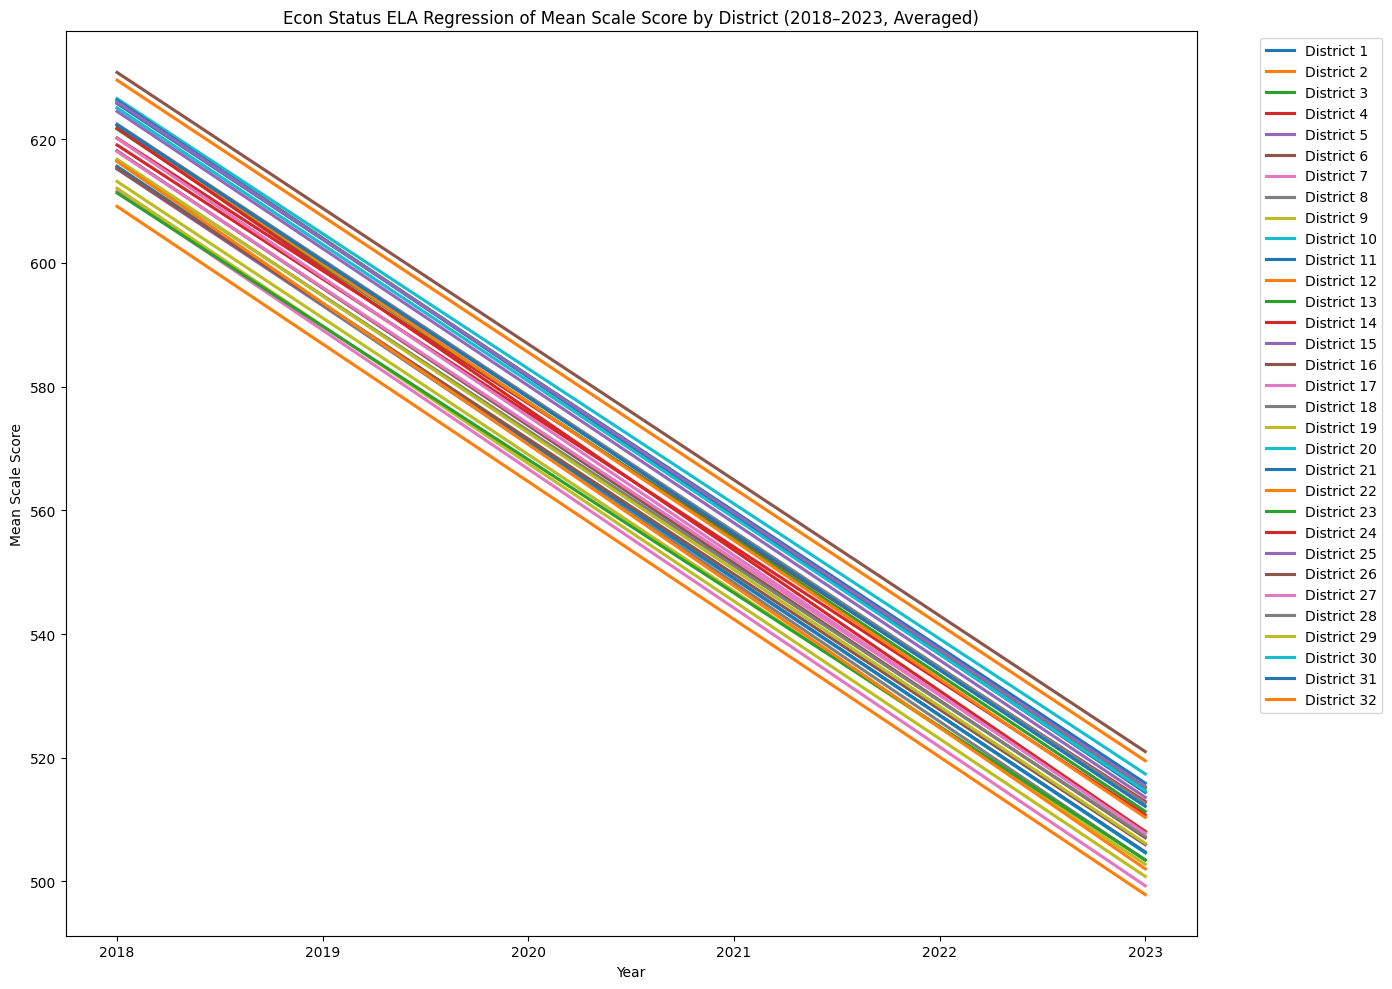

In [ ]:
ela_economic_df = pd.read_excel("ela.xlsx", sheet_name="Econ Status")

ela_economic_df = ela_economic_df[ela_economic_df["Grade"] == "All Grades"].copy()
ela_economic_df["Year"] = pd.to_numeric(ela_economic_df["Year"], errors='coerce')
ela_economic_df = ela_economic_df[ela_economic_df['Mean Scale Score'] != 's']
ela_economic_df['Mean Scale Score'] = pd.to_numeric(ela_economic_df['Mean Scale Score'], errors='coerce')

district_yearly_avg = ela_economic_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]

plt.figure(figsize=(14, 10))
for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Econ Status ELA Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
district_regression_results = []
for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        district_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

district_regression_df = pd.DataFrame(district_regression_results)
district_comparison_df = district_regression_df.sort_values(by="R-squared", ascending=False)

district_comparison_df

District  R-squared  Coef (Year)   P-value
31        32   0.495369   -22.874006  0.296176
23        24   0.495007   -22.751144  0.296433
12        13   0.493462   -22.070160  0.297532
7          8   0.493046   -22.430570  0.297828
26        27   0.492933   -22.473997  0.297908
21        22   0.492505   -22.380782  0.298213
2          3   0.492157   -22.229527  0.298461
14        15   0.492092   -22.183520  0.298507
1          2   0.491166   -22.008267  0.299168
18        19   0.491077   -22.083872  0.299231
10        11   0.490683   -22.170035  0.299512
0          1   0.490268   -21.978521  0.299808
5          6   0.488973   -22.214367  0.300734
20        21   0.488270   -22.382311  0.301237
9         10   0.488255   -22.202577  0.301248
11        12   0.488070   -22.256010  0.301380
15        16   0.487180   -21.865893  0.302017
4          5   0.486804   -22.086891  0.302286
6          7   0.486579   -22.457877  0.302448
30        31   0.486159   -22.032855  0.302749
28        29   0.485815   -22.121182  0.302996
29        30   0.485271   -22.085526  0.303386
25        26   0.485121   -21.963068  0.303494
24        25   0.485043   -22.134873  0.303550
8          9   0.484521   -22.250901  0.303925
27        28   0.484254   -21.960141  0.304116
13        14   0.483147   -21.665357  0.304912
19        20   0.480881   -21.835782  0.306544
22        23   0.480518   -21.565317  0.306806
16        17   0.480056   -21.978229  0.307139
17        18   0.479005   -21.865128  0.307898
3          4   0.474848   -21.456084  0.310908

In [ ]:

ela_economic_df["Mean Scale Score"] = pd.to_numeric(ela_economic_df["Mean Scale Score"], errors="coerce")
ela_economic_df = ela_economic_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
ela_economic_df = ela_economic_df[ela_economic_df["Year"].between(2018, 2023)]

hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", ela_economic_df, groups=ela_economic_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM      Dependent Variable:      Q('Mean Scale Score')
No. Observations:       256          Method:                  REML                 
No. Groups:             32           Scale:                   2251.9249            
Min. group size:        8            Log-Likelihood:          -1344.1796           
Max. group size:        8            Converged:               Yes                  
Mean group size:        8.0                                                        
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                      45263.741 2906.845  15.571 0.000 39566.430 50961.052
C(Category)[T.Not Econ Disadv]    10.342    5.932   1.744 0.081    -1.284    21.969
Year                             -22.125    1.439 -15.379 0.000   -24.945   -19.306
Group Var                          5.838                                           
===================================================================================

"""

## Math

In [ ]:
math_economic_df=pd.read_excel("math.xlsx",sheet_name="Econ Status")
math_economic_df

District       Grade  Year         Category  Number Tested  \
0            1           3  2023      Econ Disadv            367   
1            1           3  2023  Not Econ Disadv            208   
2            1           4  2023      Econ Disadv            344   
3            1           4  2023  Not Econ Disadv            193   
4            1           5  2023      Econ Disadv            372   
...        ...         ...   ...              ...            ...   
4027        32           7  2013  Not Econ Disadv             95   
4028        32           8  2013      Econ Disadv           1180   
4029        32           8  2013  Not Econ Disadv            124   
4030        32  All Grades  2013      Econ Disadv           7160   
4031        32  All Grades  2013  Not Econ Disadv            452   

      Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
0           441.193451        109  29.700272        131  35.694824         81   
1           476.923065          4   1.923077         29  13.942307         65   
2           442.799408        130  37.790699         77  22.383720        100   
3           476.430054         15   7.772021         17   8.808290         60   
4           442.153229        166  44.623657         79  21.236559         74   
...                ...        ...        ...        ...        ...        ...   
4027        293.178955         42  44.210526         33  34.736843         17   
4028        283.280518        606  51.355930        402  34.067795        130   
4029        293.661285         44  35.483871         54  43.548386         21   
4030        285.563690       3504  48.938549       2587  36.131287        848   
4031        291.995575        173  38.274338        184  40.707966         77   

      % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0     22.070845         46  12.534060          127    34.604904  
1     31.250000        110  52.884617          175    84.134613  
2     29.069767         37  10.755814          137    39.825581  
3     31.088083        101  52.331608          161    83.419685  
4     19.892473         53  14.247312          127    34.139786  
...         ...        ...        ...          ...          ...  
4027  17.894737          3   3.157895           20    21.052631  
4028  11.016949         42   3.559322          172    14.576271  
4029  16.935484          5   4.032258           26    20.967741  
4030  11.843575        221   3.086592         1069    14.930167  
4031  17.035398         18   3.982301           95    21.017698  

[4032 rows x 16 columns]

In [ ]:
math_economic_df = math_economic_df[math_economic_df["Grade"] == "All Grades"].copy()
math_economic_df

District       Grade  Year         Category  Number Tested  \
12           1  All Grades  2023      Econ Disadv           2039   
13           1  All Grades  2023  Not Econ Disadv            997   
26           1  All Grades  2022      Econ Disadv           1952   
27           1  All Grades  2022  Not Econ Disadv           1037   
40           1  All Grades  2019      Econ Disadv           2524   
...        ...         ...   ...              ...            ...   
4003        32  All Grades  2015  Not Econ Disadv            904   
4016        32  All Grades  2014      Econ Disadv           6546   
4017        32  All Grades  2014  Not Econ Disadv            396   
4030        32  All Grades  2013      Econ Disadv           7160   
4031        32  All Grades  2013  Not Econ Disadv            452   

      Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
12          445.306519        688  33.742031        524  25.698872        532   
13          479.001007         65   6.519559         97   9.729188        268   
26          593.163452        860  44.057377        489  25.051229        303   
27          616.403076        115  11.089682        145  13.982642        187   
40          598.082825        897  35.538826        617  24.445324        489   
...                ...        ...        ...        ...        ...        ...   
4003        290.381622        372  41.150444        331  36.615044        149   
4016        289.581573       2872  43.874123       2380  36.358082        959   
4017        296.383850        128  32.323231        161  40.656567         77   
4030        285.563690       3504  48.938549       2587  36.131287        848   
4031        291.995575        173  38.274338        184  40.707966         77   

      % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
12    26.091221        295  14.467876          827    40.559097  
13    26.880642        567  56.870613          835    83.751251  
26    15.522541        300  15.368853          603    30.891394  
27    18.032787        590  56.894890          777    74.927673  
40    19.374010        521  20.641838         1010    40.015846  
...         ...        ...        ...          ...          ...  
4003  16.482302         52   5.752213          201    22.234512  
4016  14.650168        335   5.117629         1294    19.767797  
4017  19.444445         30   7.575758          107    27.020203  
4030  11.843575        221   3.086592         1069    14.930167  
4031  17.035398         18   3.982301           95    21.017698  

[576 rows x 16 columns]

In [ ]:
math_economic_df_filtered = math_economic_df[math_economic_df["Year"].between(2018, 2023)].copy()
math_economic_df_filtered["Year Group"] = math_economic_df_filtered["Year"].apply(year_group)
math_economic_df_filtered = math_economic_df_filtered[math_economic_df_filtered['Mean Scale Score'] != 's']
math_economic_df_filtered['Mean Scale Score'] = pd.to_numeric(math_economic_df_filtered['Mean Scale Score'])


In [ ]:
math_economic_df_filtered.head()

District       Grade  Year         Category  Number Tested  \
12         1  All Grades  2023      Econ Disadv           2039   
13         1  All Grades  2023  Not Econ Disadv            997   
26         1  All Grades  2022      Econ Disadv           1952   
27         1  All Grades  2022  Not Econ Disadv           1037   
40         1  All Grades  2019      Econ Disadv           2524   

    Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
12        445.306519        688  33.742031        524  25.698872        532   
13        479.001007         65   6.519559         97   9.729188        268   
26        593.163452        860  44.057377        489  25.051229        303   
27        616.403076        115  11.089682        145  13.982642        187   
40        598.082825        897  35.538826        617  24.445324        489   

    % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4     Year Group  
12  26.091221        295  14.467876          827    40.559097  Post-Pandemic  
13  26.880642        567  56.870613          835    83.751251  Post-Pandemic  
26  15.522541        300  15.368853          603    30.891394  Post-Pandemic  
27  18.032787        590  56.894890          777    74.927673  Post-Pandemic  
40  19.374010        521  20.641838         1010    40.015846   Pre-Pandemic

### The best performing Economic Status

In [ ]:
economic_avg_scores = math_economic_df_filtered.groupby(["District","Category"])["Mean Scale Score"].mean().reset_index()
best_econ_math = economic_avg_scores.sort_values("Mean Scale Score", ascending=False).head(1)
best_econ_math

District         Category  Mean Scale Score
5         3  Not Econ Disadv        582.045006

### The Worst Performing Economic Status

In [ ]:
worst_econ_math = economic_avg_scores.sort_values("Mean Scale Score", ascending=True).head(1)
worst_econ_math

District     Category  Mean Scale Score
8         5  Econ Disadv         548.83683

### ANOVA


In [ ]:
model = ols("Q('Mean Scale Score') ~ C(Category) * C(Q('Year Group'))", data=math_economic_df_filtered).fit()
economic_anova_results = anova_lm(model)
economic_anova_results

df         sum_sq        mean_sq  \
C(Category)                       1.0    7021.546744    7021.546744   
C(Q('Year Group'))                1.0  364444.663435  364444.663435   
C(Category):C(Q('Year Group'))    1.0     223.067599     223.067599   
Residual                        252.0  673750.410725    2673.612741   

                                         F        PR(>F)  
C(Category)                       2.626239  1.063610e-01  
C(Q('Year Group'))              136.311687  1.839741e-25  
C(Category):C(Q('Year Group'))    0.083433  7.729354e-01  
Residual                               NaN           NaN

#### District

In [ ]:
anova_model_district_pandemic = ols("Q('Mean Scale Score') ~ C(District) * C(Q('Year Group'))", data=math_economic_df_filtered).fit()
anova_district_pandemic_results = anova_lm(anova_model_district_pandemic)
anova_district_pandemic_results

df         sum_sq        mean_sq  \
C(District)                      31.0   12874.112275     415.293944   
C(Q('Year Group'))                1.0  364444.663435  364444.663435   
C(District):C(Q('Year Group'))   31.0     217.633273       7.020428   
Residual                        192.0  667903.279519    3478.662914   

                                         F        PR(>F)  
C(District)                       0.119383  1.000000e+00  
C(Q('Year Group'))              104.765731  6.714415e-20  
C(District):C(Q('Year Group'))    0.002018  1.000000e+00  
Residual                               NaN           NaN

#### Regression


In [ ]:
math_economic_df = pd.read_excel("math.xlsx", sheet_name="Econ Status")

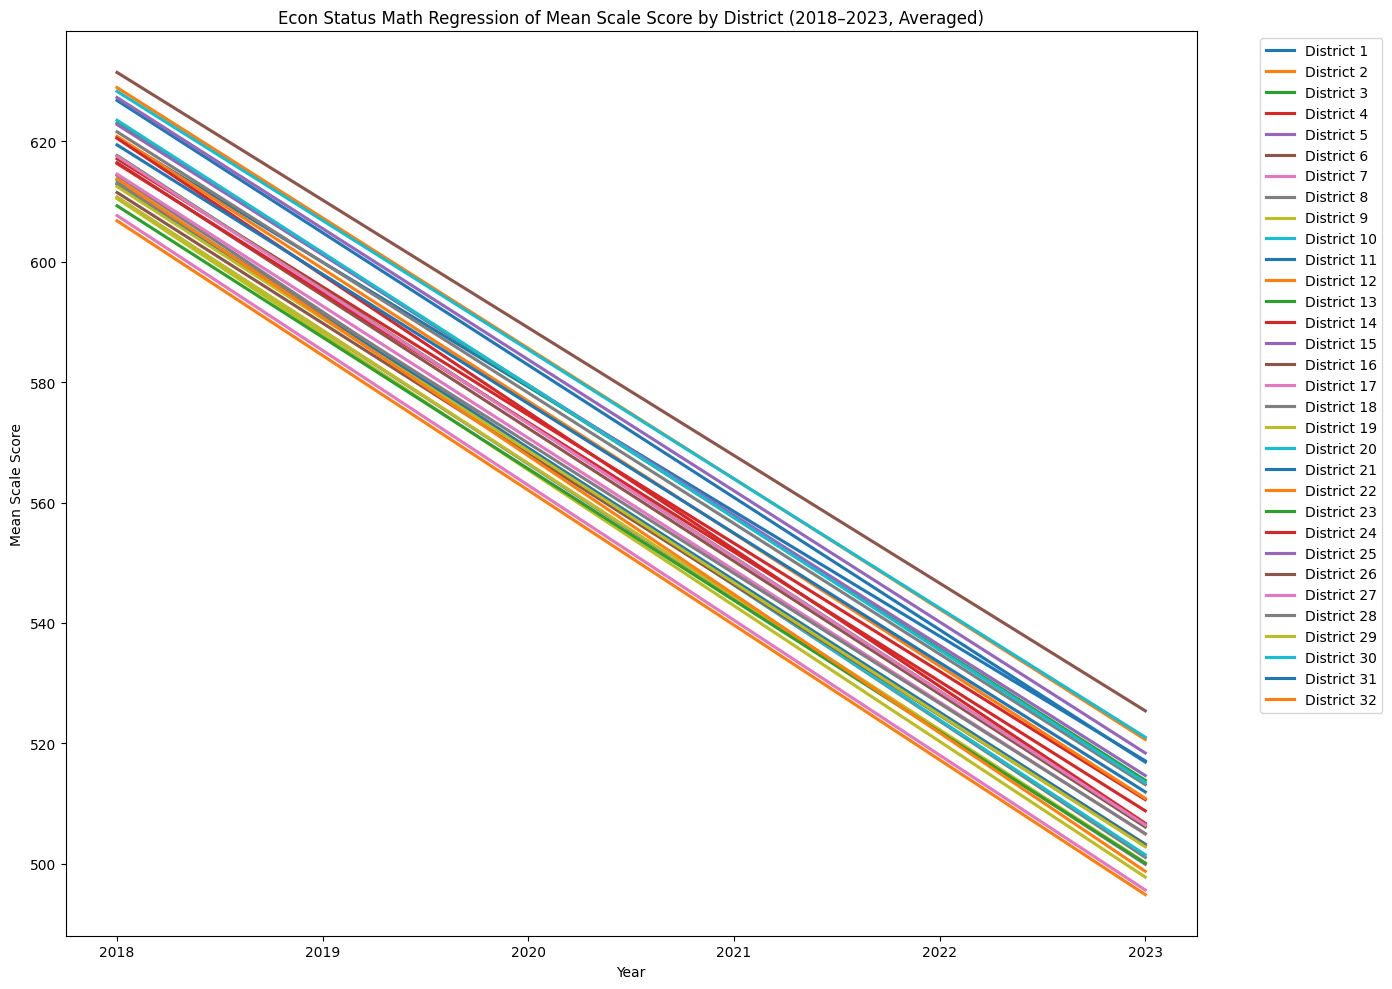

In [ ]:
math_economic_df = math_economic_df[math_economic_df["Grade"] == "All Grades"].copy()
math_economic_df["Year"] = pd.to_numeric(math_economic_df["Year"], errors='coerce')
math_economic_df = math_economic_df[math_economic_df['Mean Scale Score'] != 's']
math_economic_df['Mean Scale Score'] = pd.to_numeric(math_economic_df['Mean Scale Score'], errors='coerce')

math_district_yearly_avg = math_economic_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
math_district_yearly_avg = math_district_yearly_avg[math_district_yearly_avg["Year"].between(2018, 2023)]

plt.figure(figsize=(14, 10))
for district in math_district_yearly_avg["District"].unique():
    df_district = math_district_yearly_avg[math_district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Econ Status Math Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

math_regression_results = []
for district in math_district_yearly_avg["District"].unique():
    df_district = math_district_yearly_avg[math_district_yearly_avg["District"] == district]
    if len(df_district) >= 2:
        model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
        math_regression_results.append({
            "District": district,
            "R-squared": model.rsquared,
            "Coef (Year)": model.params["Year"],
            "P-value": model.pvalues["Year"]
        })

math_regression_df = pd.DataFrame(math_regression_results)
math_comparison_df = math_regression_df.sort_values(by="R-squared", ascending=False)

In [ ]:
math_comparison_df

District  R-squared  Coef (Year)   P-value
31        32   0.531209   -23.008249  0.271159
7          8   0.526875   -22.659509  0.274139
23        24   0.525703   -22.759588  0.274946
12        13   0.518457   -22.245226  0.279960
26        27   0.518435   -22.219575  0.279976
20        21   0.518241   -21.982991  0.280110
6          7   0.517761   -22.408601  0.280444
9         10   0.517030   -22.412059  0.280952
5          6   0.516586   -22.074585  0.281261
1          2   0.516302   -21.657744  0.281459
29        30   0.516071   -22.003359  0.281619
8          9   0.515898   -22.540102  0.281740
19        20   0.515125   -21.457690  0.282278
21        22   0.514970   -21.994008  0.282386
18        19   0.513980   -22.110243  0.283076
22        23   0.513208   -21.846523  0.283615
4          5   0.513188   -22.160277  0.283628
24        25   0.513116   -21.777497  0.283679
11        12   0.512951   -22.386592  0.283794
14        15   0.512568   -21.628850  0.284061
10        11   0.511859   -21.931884  0.284557
16        17   0.510804   -21.925744  0.285295
2          3   0.509488   -21.835907  0.286215
13        14   0.509174   -21.505289  0.286436
25        26   0.508883   -21.209456  0.286640
27        28   0.508287   -21.691286  0.287058
15        16   0.506319   -21.709605  0.288439
30        31   0.506253   -21.497586  0.288485
28        29   0.505289   -21.934326  0.289163
17        18   0.499694   -21.616898  0.293110
3          4   0.490272   -21.292160  0.299806
0          1   0.479805   -20.707399  0.307321

In [ ]:
math_economic_df["Year"] = pd.to_numeric(math_economic_df["Year"])

math_economic_df = math_economic_df[math_economic_df['Mean Scale Score'] != 's']
math_economic_df['Mean Scale Score'] = pd.to_numeric(math_economic_df['Mean Scale Score'])

district_yearly_avg = math_economic_df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]

In [ ]:
district_comparison_df = district_regression_df.sort_values(by="R-squared", ascending=False)
district_comparison_df

District  R-squared  Coef (Year)   P-value
31        32   0.495369   -22.874006  0.296176
23        24   0.495007   -22.751144  0.296433
12        13   0.493462   -22.070160  0.297532
7          8   0.493046   -22.430570  0.297828
26        27   0.492933   -22.473997  0.297908
21        22   0.492505   -22.380782  0.298213
2          3   0.492157   -22.229527  0.298461
14        15   0.492092   -22.183520  0.298507
1          2   0.491166   -22.008267  0.299168
18        19   0.491077   -22.083872  0.299231
10        11   0.490683   -22.170035  0.299512
0          1   0.490268   -21.978521  0.299808
5          6   0.488973   -22.214367  0.300734
20        21   0.488270   -22.382311  0.301237
9         10   0.488255   -22.202577  0.301248
11        12   0.488070   -22.256010  0.301380
15        16   0.487180   -21.865893  0.302017
4          5   0.486804   -22.086891  0.302286
6          7   0.486579   -22.457877  0.302448
30        31   0.486159   -22.032855  0.302749
28        29   0.485815   -22.121182  0.302996
29        30   0.485271   -22.085526  0.303386
25        26   0.485121   -21.963068  0.303494
24        25   0.485043   -22.134873  0.303550
8          9   0.484521   -22.250901  0.303925
27        28   0.484254   -21.960141  0.304116
13        14   0.483147   -21.665357  0.304912
19        20   0.480881   -21.835782  0.306544
22        23   0.480518   -21.565317  0.306806
16        17   0.480056   -21.978229  0.307139
17        18   0.479005   -21.865128  0.307898
3          4   0.474848   -21.456084  0.310908

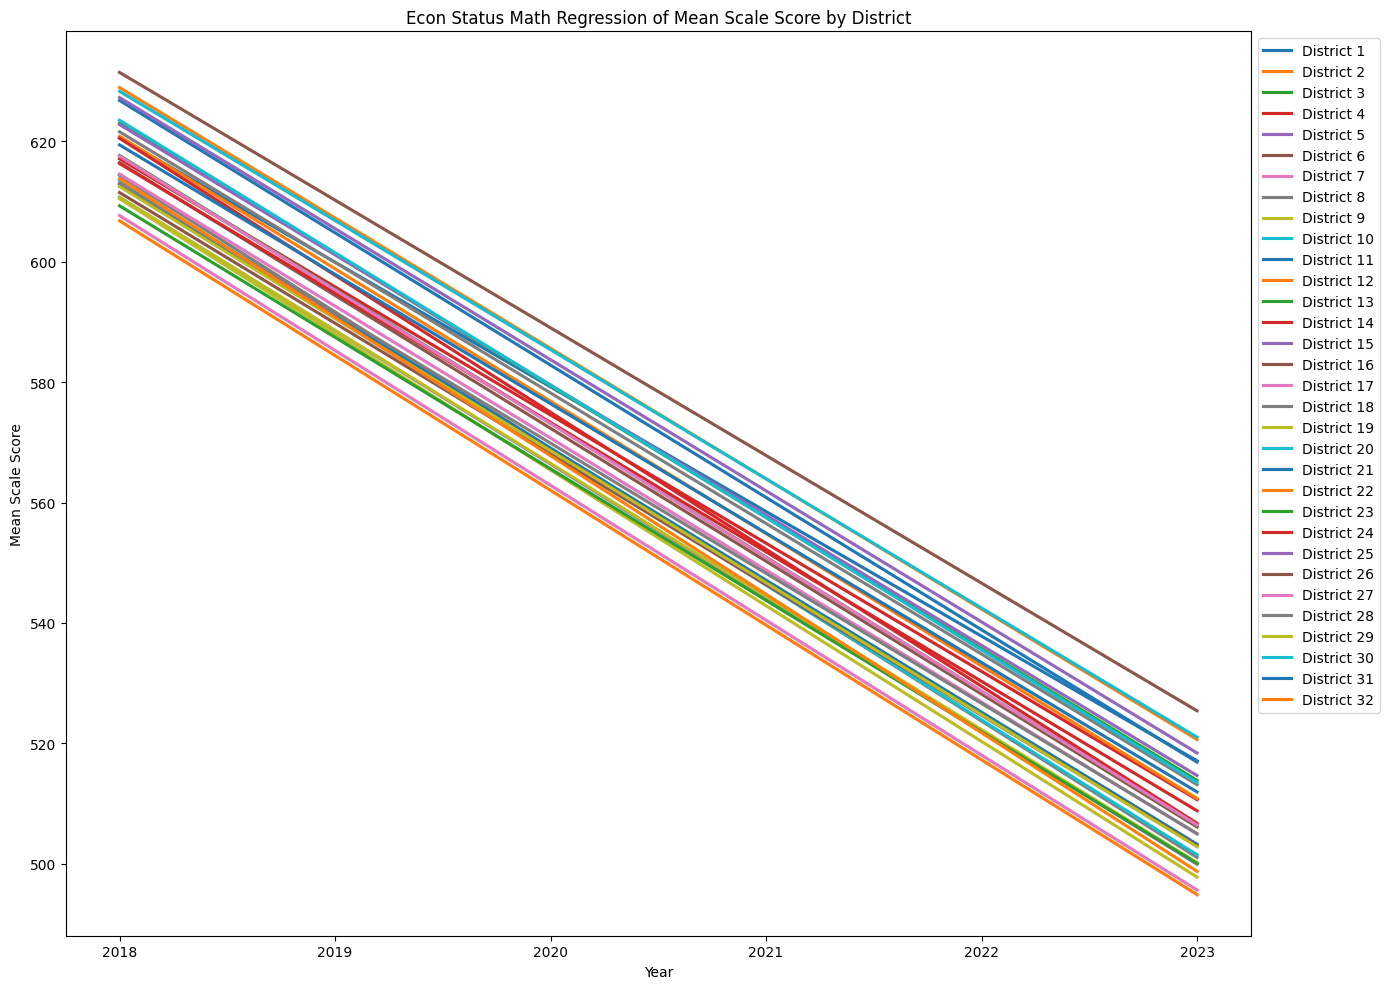

In [ ]:
plt.figure(figsize=(14, 10))
for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Econ Status Math Regression of Mean Scale Score by District")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### HLM Regression


In [ ]:
math_economic_df["Mean Scale Score"] = pd.to_numeric(math_economic_df["Mean Scale Score"], errors="coerce")
math_economic_df = math_economic_df.dropna(subset=["Mean Scale Score", "District", "Year", "Category"])
math_economic_df = math_economic_df[math_economic_df["Year"].between(2018, 2023)]

hlm_model = smf.mixedlm("Q('Mean Scale Score') ~ Year + C(Category)", math_economic_df, groups=math_economic_df["District"])
hlm_result = hlm_model.fit()
hlm_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM      Dependent Variable:      Q('Mean Scale Score')
No. Observations:       256          Method:                  REML                 
No. Groups:             32           Scale:                   2032.9032            
Min. group size:        8            Log-Likelihood:          -1331.1663           
Max. group size:        8            Converged:               No                   
Mean group size:        8.0                                                        
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                      44894.230 2761.870  16.255 0.000 39481.064 50307.395
C(Category)[T.Not Econ Disadv]    10.474    5.636   1.858 0.063    -0.572    21.521
Year                             -21.943    1.367 -16.053 0.000   -24.623   -19.264
Group Var                          4.106                                           
===================================================================================

"""

In [ ]:
hlm_result.aic

Code generated by the help of:
Stack overflow


*   https://stackoverflow.com/questions/71844227/how-to-loop-through-lists-to-create-multiple-plots-python

GeekforGeeks for HLM syntax:

*   https://www.geeksforgeeks.org/complete-guide-to-hierarchical-linear-modeling/



